<a href="https://colab.research.google.com/github/Jit562/ML_Bike_rental_predication/blob/main/Rental_Bike_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seoul Bike Sharing Demand Prediction

## Problem Description

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## Data Description
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

## Attribute Information:



*   Date : year-month-day
*   Rented Bike count - Count of bikes rented at each hour
*   Hour - Hour of he day
*   Temperature-Temperature in Celsius
*   Humidity - %
*   Windspeed - m/s
*   Visibility - 10m
*   Dew point temperature - Celsius
*   Solar radiation - MJ/m2
*   Rainfall - mm
*   Snowfall - cm
*   Seasons - Winter, Spring, Summer, Autumn
*   Holiday - Holiday/No holiday
*   Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



## Import Dependancy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge, ElasticNet # Handle Overfiting Problems
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error # Handle Error

import math

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # dataset preprocess for numerical dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder # for categorical dataset


from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline, Pipeline

## Load Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/SeoulBikeData.csv', encoding = 'unicode_escape')
df.sample(5) # remdom check data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
5821  31/07/2018                623    13             36.1           38   
1898  18/02/2018                 86     2             -4.7           33   
7401  05/10/2018                 47     9             16.3           85   
651   28/12/2017                 86     3             -6.0           32   
7282  30/09/2018                  0    10             20.7           62   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
5821               1.0              2000                       19.5   
1898               0.1              2000                      -18.5   
7401               1.8               942                       13.7   
651                2.5              2000                      -20.0   
7282               1.3              1679                       13.1   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
5821                     3.12           0.0            0.0  Summer   
1898                     0.00           0.0            0.0  Winter   
7401                     0.13           1.2            0.0  Autumn   
651                      0.00           0.0            0.0  Winter   
7282                     1.41           0.0            0.0  Autumn   

         Holiday Functioning Day  
5821  No Holiday             Yes  
1898  No Holiday             Yes  
7401  No Holiday             Yes  
651   No Holiday             Yes  
7282  No Holiday              No

## Check the basic information of the dataset

In [3]:
df.head() # check top 5 dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [4]:
df.tail() # check below 5 data

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [5]:
df.info() #check data type and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
df.shape # check howmany row and columns in the dataset

(8760, 14)

In [7]:
df.describe() # check data destribution

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

## Exploratory Data Analysis (EDA)

In [8]:
df.isnull().sum() # check dataset Null values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64



*   So according to data we do not have any null value.

*   Rented Bike Count column is dependent column and rest columns are independant columns.
*   We have four object columns six float columns and four int columns.



In [9]:
df.duplicated().sum() # check Dupliicated values

0

## Check the outlayer

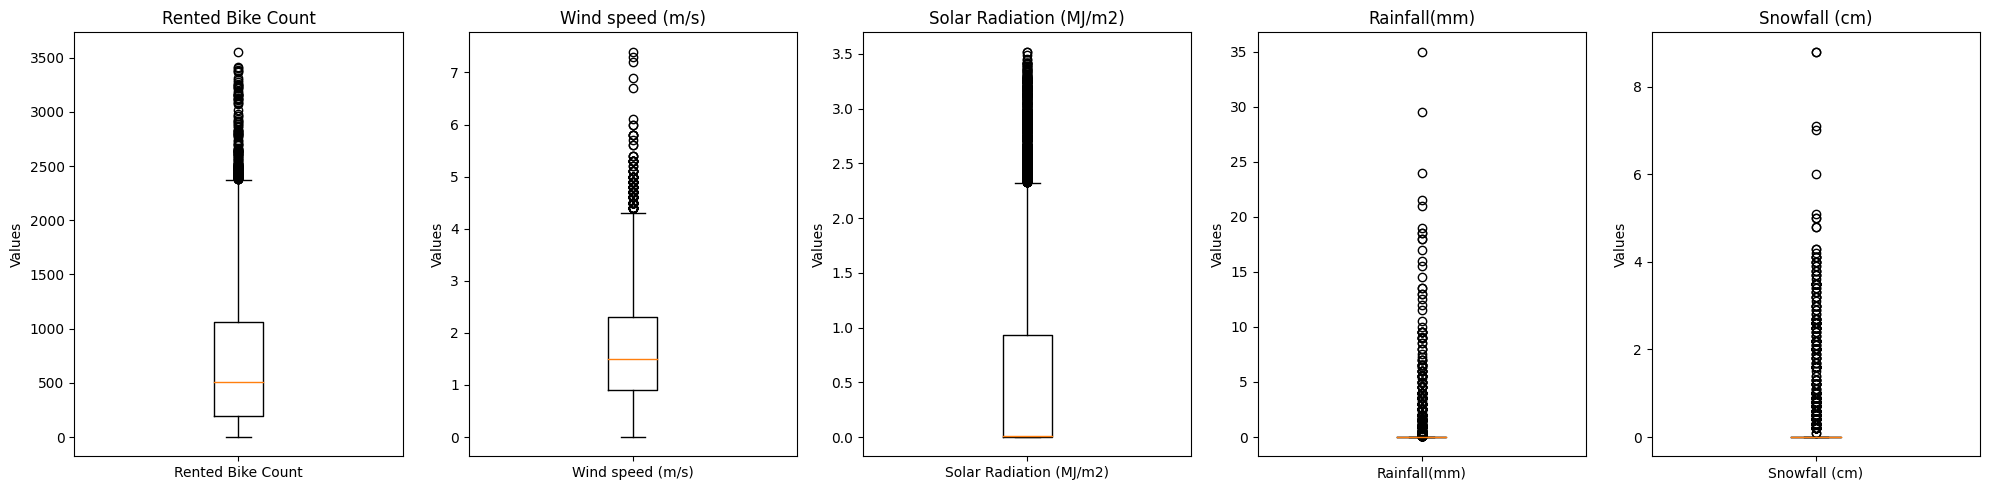

In [10]:
# List of columns to plot
columns_to_plot = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Number of plots
num_plots = len(columns_to_plot)

# Create a figure and axes array
fig, axes = plt.subplots(1, num_plots, figsize=(20, 5))  # Adjust the figure size as needed

# Plot each box plot in its own subplot
for i, column in enumerate(columns_to_plot):
    axes[i].boxplot(df[column])
    axes[i].set_title(column)
    axes[i].set_ylabel('Values')
    axes[i].set_xticklabels([column])  # Set x-tick labels

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [11]:
n_df = df.copy()
n_df.shape

(8760, 14)

## Remove Outlayer of the Rented Bike Count

In [12]:
# Finding the IQR
percentile25 = df['Rented Bike Count'].quantile(0.25)
percentile75 = df['Rented Bike Count'].quantile(0.75)

In [13]:
iqr = percentile75 - percentile25

In [14]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [15]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 2376.625
Lower limit -1120.375


## Using capping method remove outlayer

In [16]:
n_df['Rented Bike Count'] = np.where(
    n_df['Rented Bike Count'] > upper_limit,
    upper_limit,
    np.where(
        n_df['Rented Bike Count'] < lower_limit,
        lower_limit,
        n_df['Rented Bike Count']
    )
)

In [17]:
n_df.shape

(8760, 14)

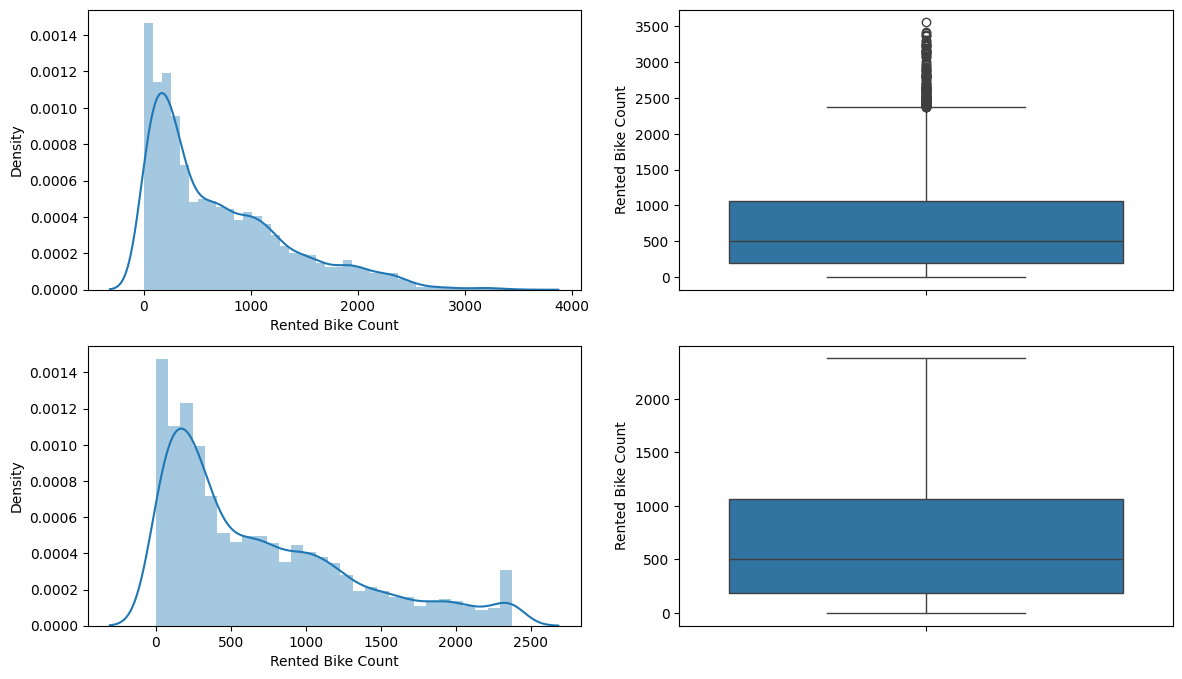

In [18]:
# Comparing

plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.distplot(df['Rented Bike Count'])

plt.subplot(2,2,2)
sns.boxplot(df['Rented Bike Count'])

plt.subplot(2,2,3)
sns.distplot(n_df['Rented Bike Count'])

plt.subplot(2,2,4)
sns.boxplot(n_df['Rented Bike Count'])

plt.show()

## Remove Outlayer of the Wind speed (m/s)

In [19]:
new_df = n_df.copy()

In [20]:
Q1 = new_df['Wind speed (m/s)'].quantile(0.25)
Q3 = new_df['Wind speed (m/s)'].quantile(0.75)

iqr = Q3 - Q1

In [21]:
lower_band = Q1 - 1.5 * iqr
upper_band = Q3 + 1.5 * iqr

In [22]:
new_df[new_df['Wind speed (m/s)'] > upper_band]


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
82    04/12/2017              311.0    10             -1.1           40   
84    04/12/2017              393.0    12             -0.3           38   
85    04/12/2017              391.0    13              0.0           30   
86    04/12/2017              338.0    14              0.1           27   
87    04/12/2017              341.0    15             -0.1           25   
...          ...                ...   ...              ...          ...   
7934  27/10/2018             1183.0    14             10.8           37   
7937  27/10/2018             1176.0    17              9.5           34   
7985  29/10/2018             1274.0    17             10.0           43   
8242  09/11/2018                0.0    10             11.3           68   
8245  09/11/2018                0.0    13             14.0           46   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
82                 4.5              2000                      -13.0   
84                 4.8              1823                      -12.9   
85                 5.4              1938                      -15.5   
86                 4.5              2000                      -16.7   
87                 5.8              2000                      -17.8   
...                ...               ...                        ...   
7934               4.4              2000                       -3.3   
7937               5.7              2000                       -5.6   
7985               4.9              2000                       -2.0   
8242               4.7              1984                        5.5   
8245               5.3               927                        2.5   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
82                       0.64           0.0            0.0  Winter   
84                       1.11           0.0            0.0  Winter   
85                       1.17           0.0            0.0  Winter   
86                       1.09           0.0            0.0  Winter   
87                       0.88           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
7934                     1.29           0.0            0.0  Autumn   
7937                     0.45           0.0            0.0  Autumn   
7985                     0.43           0.0            0.0  Autumn   
8242                     0.44           0.0            0.0  Autumn   
8245                     1.68           0.0            0.0  Autumn   

         Holiday Functioning Day  
82    No Holiday             Yes  
84    No Holiday             Yes  
85    No Holiday             Yes  
86    No Holiday             Yes  
87    No Holiday             Yes  
...          ...             ...  
7934  No Holiday             Yes  
7937  No Holiday             Yes  
7985  No Holiday             Yes  
8242  No Holiday              No  
8245  No Holiday              No  

[161 rows x 14 columns]

In [23]:
new_df[new_df['Wind speed (m/s)'] < lower_band]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day]
Index: []

## Trimming the data

In [24]:
new_d = new_df[new_df['Wind speed (m/s)'] < upper_band]

In [25]:
new_d.shape

(8599, 14)

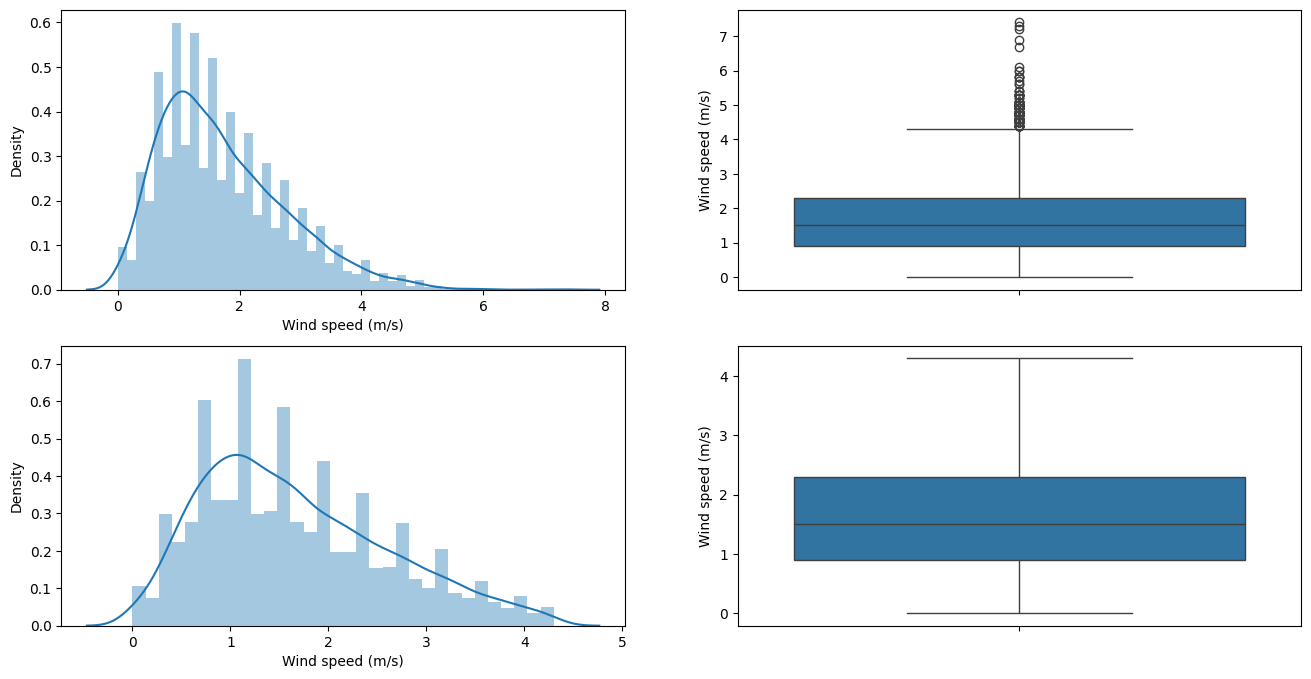

In [26]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Wind speed (m/s)'])

plt.subplot(2,2,2)
sns.boxplot(df['Wind speed (m/s)'])

plt.subplot(2,2,3)
sns.distplot(new_d['Wind speed (m/s)'])

plt.subplot(2,2,4)
sns.boxplot(new_d['Wind speed (m/s)'])

plt.show()

## Remove Outlayer of the olar Radiation (MJ/m2)

In [27]:
Qs1 = n_df['Solar Radiation (MJ/m2)'].quantile(0.25)
Qs3 = n_df['Solar Radiation (MJ/m2)'].quantile(0.75)

iqrs = Qs3 - Qs1

In [28]:
upper_bands = Qs3 + 1.5 * iqrs
lower_bands = Qs1 - 1.5 * iqrs

# Trimming of chaining method

In [29]:
n_df['Solar Radiation (MJ/m2)'] = np.where(
    n_df['Solar Radiation (MJ/m2)'] > upper_bands ,
    upper_bands ,
    np.where(
        n_df['Solar Radiation (MJ/m2)'] < lower_bands,
        lower_bands,
        n_df['Solar Radiation (MJ/m2)']
    )
)

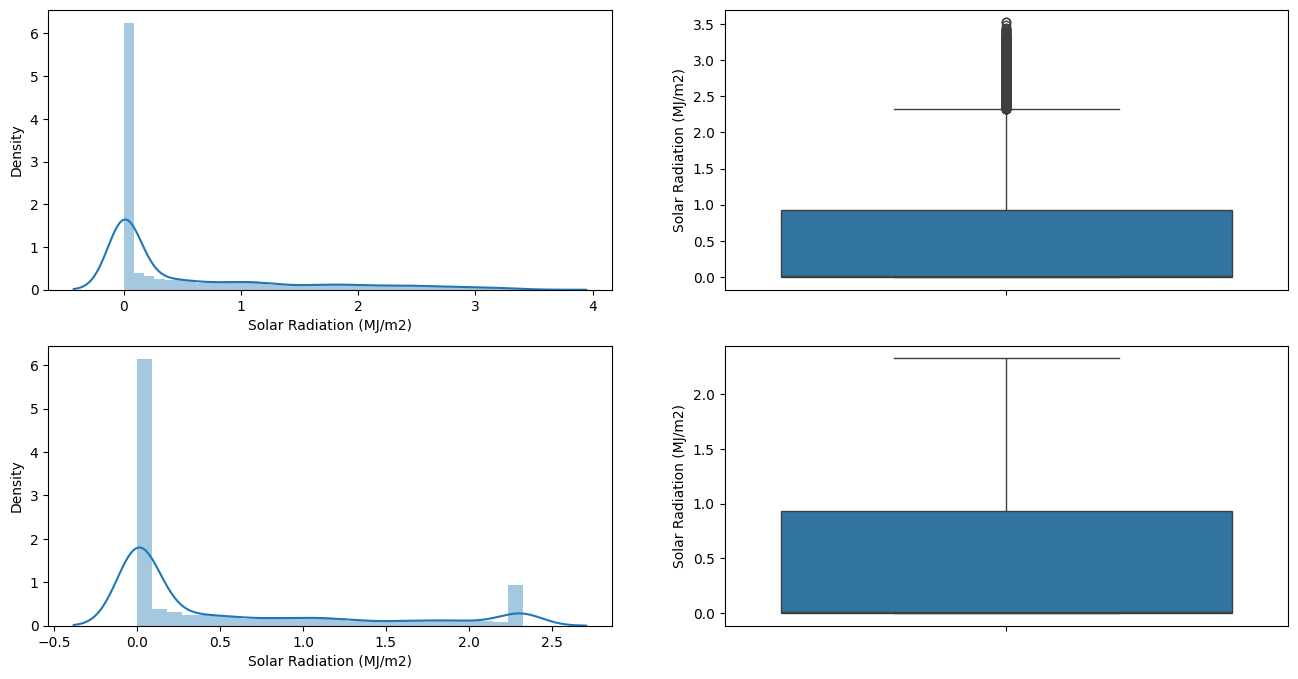

In [30]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Solar Radiation (MJ/m2)'])

plt.subplot(2,2,2)
sns.boxplot(df['Solar Radiation (MJ/m2)'])

plt.subplot(2,2,3)
sns.distplot(n_df['Solar Radiation (MJ/m2)'])

plt.subplot(2,2,4)
sns.boxplot(n_df['Solar Radiation (MJ/m2)'])

plt.show()

## Remove Outlayer of the Rainfall

In [31]:
Qr1 = n_df['Rainfall(mm)'].quantile(0.25)
Qr3 = n_df['Rainfall(mm)'].quantile(0.75)

iqrr = Qr3 - Qr1

In [32]:
upr = Qr3 + 1.5 * iqrr
lor = Qr1 - 1.5 * iqrr

## Champing

In [33]:
n_df['Rainfall(mm)'] = np.where(
    n_df['Rainfall(mm)'] > upr ,
    upr ,
    np.where(
        n_df['Rainfall(mm)'] < lor,
        lor,
        n_df['Rainfall(mm)']
    )
)

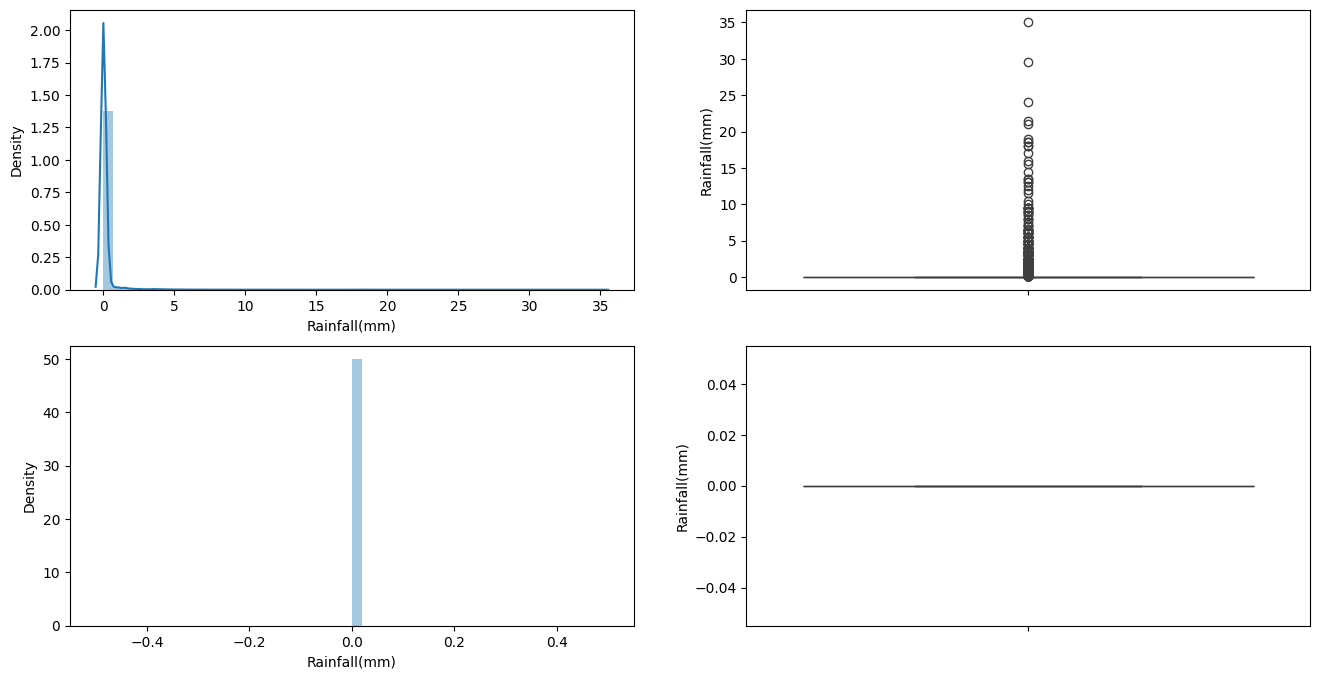

In [34]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Rainfall(mm)'])

plt.subplot(2,2,2)
sns.boxplot(df['Rainfall(mm)'])

plt.subplot(2,2,3)
sns.distplot(n_df['Rainfall(mm)'])

plt.subplot(2,2,4)
sns.boxplot(n_df['Rainfall(mm)'])

plt.show()

## Remove Outlayer of the Snowfall

In [35]:
columns_to_plot = ['Rented Bike Count', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

In [36]:
Qrs1 = n_df['Snowfall (cm)'].quantile(0.25)
Qrs3 = n_df['Snowfall (cm)'].quantile(0.75)

iqrs = Qrs3 - Qrs1

In [37]:
ups = Qrs3 + 1.5 * iqrs
los = Qrs1 - 1.5 * iqrs

In [38]:
n_df['Rainfall(mm)'] = np.where(
    n_df['Rainfall(mm)'] > ups ,
    ups ,
    np.where(
        n_df['Rainfall(mm)'] < los,
        los,
        n_df['Rainfall(mm)']
    )
)

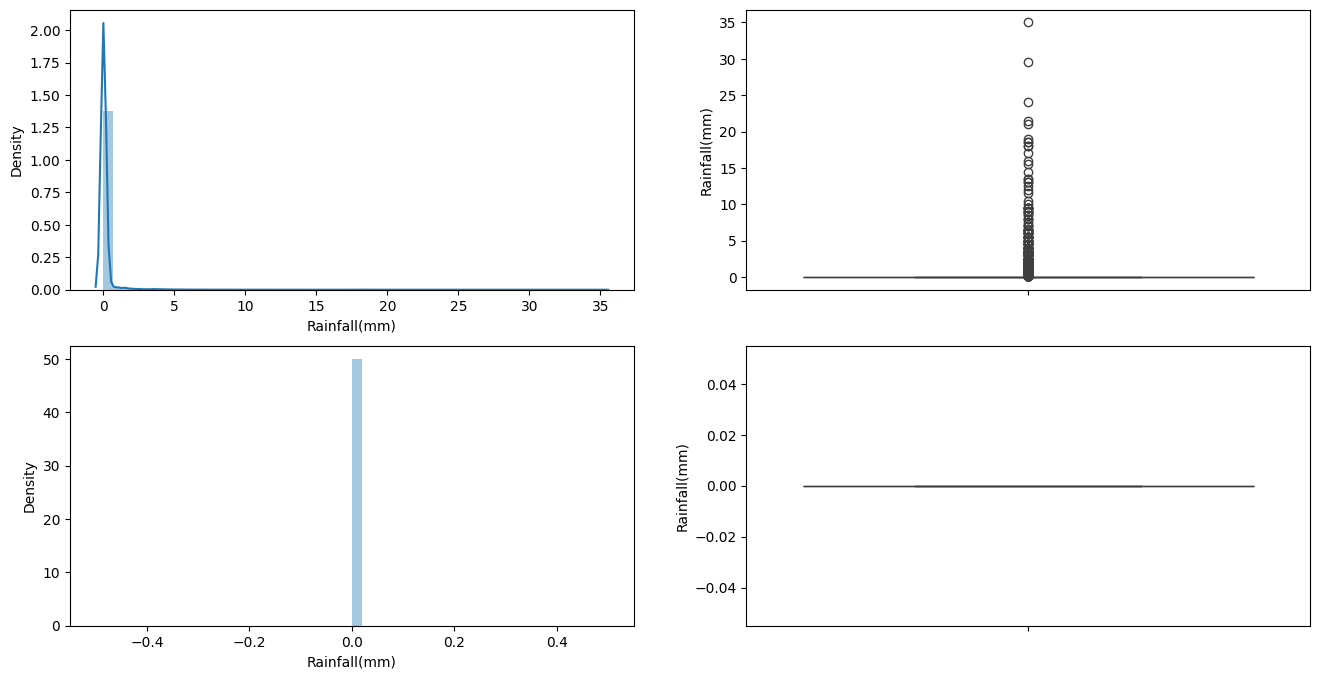

In [39]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Rainfall(mm)'])

plt.subplot(2,2,2)
sns.boxplot(df['Rainfall(mm)'])

plt.subplot(2,2,3)
sns.distplot(n_df['Rainfall(mm)'])

plt.subplot(2,2,4)
sns.boxplot(n_df['Rainfall(mm)'])

plt.show()

## Seasons Counts

In [40]:
seasons_counts = df['Seasons'].value_counts().reset_index()
seasons_counts

Seasons  count
0  Spring   2208
1  Summer   2208
2  Autumn   2184
3  Winter   2160

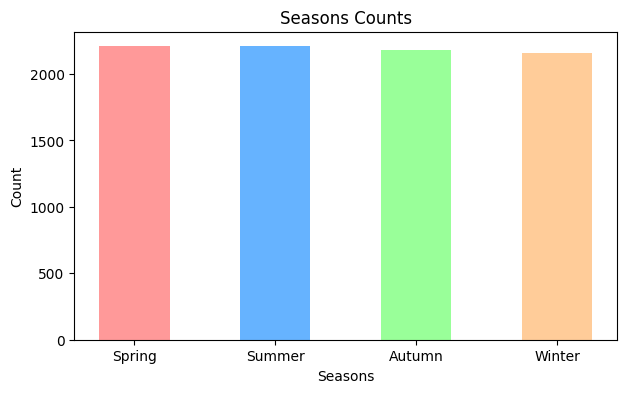

In [41]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(7,4))
plt.bar(seasons_counts['Seasons'], seasons_counts['count'], width=0.5, color=colors)
plt.title('Seasons Counts')
plt.xlabel('Seasons')
plt.ylabel('Count')
plt.show()

In [42]:

season_vs_rent_bike = (df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()).sort_values(by='Rented Bike Count', ascending=False)
season_vs_rent_bike

Seasons  Rented Bike Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

## Distribution of Bike Rentals by Season

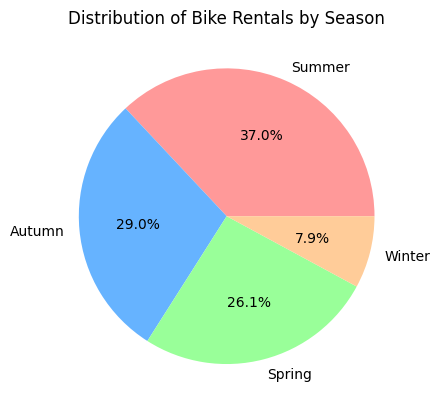

In [43]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(season_vs_rent_bike['Rented Bike Count'], labels=season_vs_rent_bike['Seasons'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Bike Rentals by Season')

In [44]:
df['Holiday'].value_counts().reset_index()

Holiday  count
0  No Holiday   8328
1     Holiday    432

## Distribution of Bike Rentals by Holiday

In [45]:
holiday_bike_rent = (df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()).sort_values(by='Rented Bike Count', ascending=False)
holiday_bike_rent

Holiday  Rented Bike Count
1  No Holiday            5956419
0     Holiday             215895

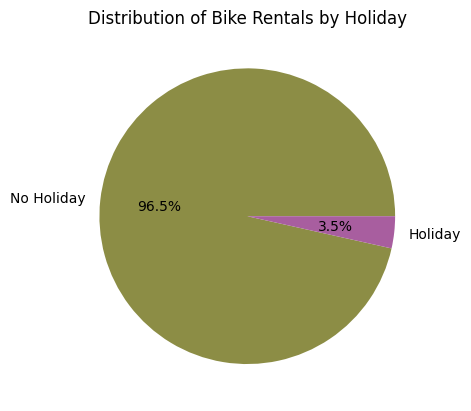

In [46]:
colors = ['#8c8d45','#a85e9f']
plt.pie(holiday_bike_rent['Rented Bike Count'], labels=holiday_bike_rent['Holiday'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Bike Rentals by Holiday')

# Distribution of Bike Rentals by Holiday vs Season

In [47]:
holiday_season_bike_rent = df.groupby(['Holiday', 'Seasons'])['Rented Bike Count'].sum().unstack()
holiday_season_bike_rent

Seasons      Autumn   Spring   Summer  Winter
Holiday                                      
Holiday       91018    45742    49063   30072
No Holiday  1698984  1566167  2234171  457097

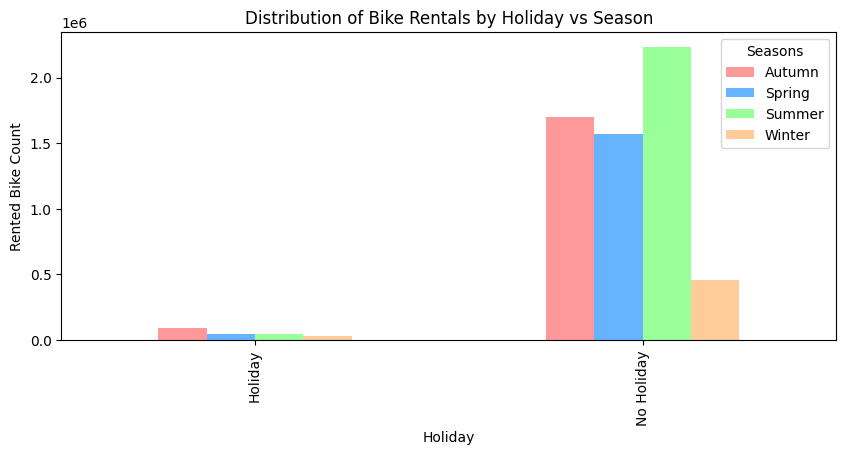

In [48]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
holiday_season_bike_rent.plot(kind='bar', figsize=(10,4), color=colors)
plt.title('Distribution of Bike Rentals by Holiday vs Season')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.show()

## Relationship b/w seasons humidity and bike count

In [49]:
session_hum_bike_count = df.groupby('Seasons') \
    .agg(avg_humidity = ('Humidity(%)','mean'),\
         max_humidity = ('Humidity(%)','max'),\
         min_humidity = ('Humidity(%)','min')).reset_index()

session_hum_bike_count

Seasons  avg_humidity  max_humidity  min_humidity
0  Autumn     59.228480            97            13
1  Spring     58.776721            98             0
2  Summer     64.981431            98            21
3  Winter     49.744907            97            14

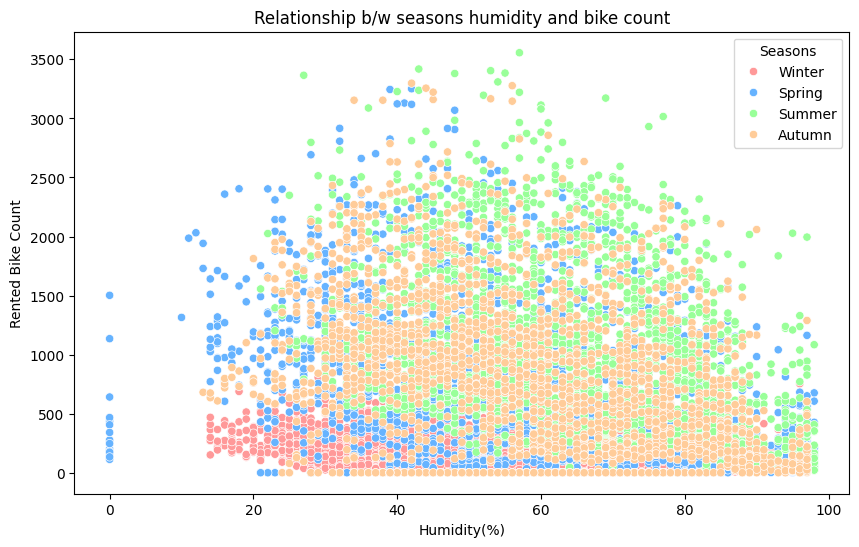

In [50]:
plt.figure(figsize=(10,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df, hue='Seasons', palette=colors)
plt.title('Relationship b/w seasons humidity and bike count')
plt.show()

## Temperature, Rented Bike Count for diffrent Seasons

In [51]:
session_temp_bike_count = df.groupby('Seasons') \
    .agg(avg_humidity = ('Temperature(°C)','mean'),\
         max_humidity = ('Temperature(°C)','max'),\
         min_humidity = ('Temperature(°C)','min')).reset_index()

session_temp_bike_count

Seasons  avg_humidity  max_humidity  min_humidity
0  Autumn     14.120833          30.5          -3.0
1  Spring     13.046694          29.4          -6.6
2  Summer     26.582790          39.4          16.3
3  Winter     -2.540463          10.3         -17.8

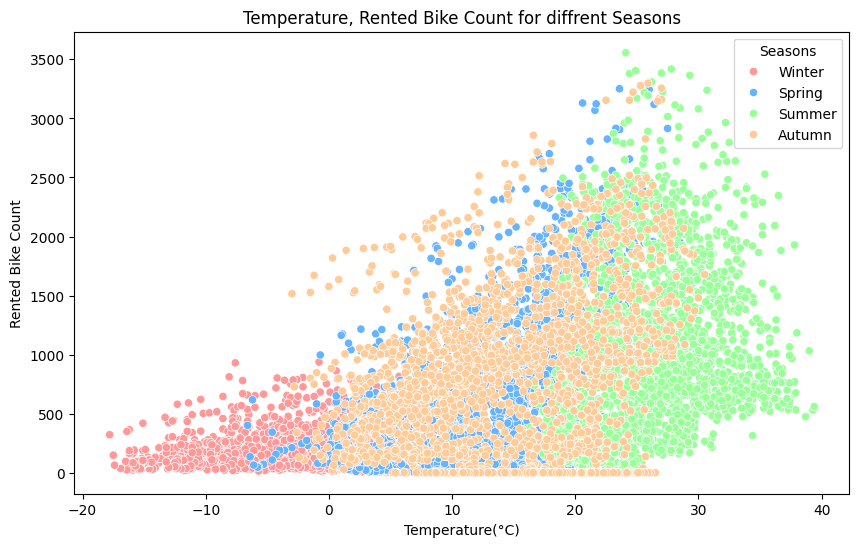

In [52]:
plt.figure(figsize=(10,6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df, hue='Seasons', palette=colors)
plt.title('Temperature, Rented Bike Count for diffrent Seasons')
plt.show()

## Hour, Rented Bike Count for diffrent Seasons

In [53]:
hour_season_rent_bike = df.groupby(['Hour','Seasons'])['Rented Bike Count'].sum().unstack()
hour_season_rent_bike

Seasons  Autumn  Spring  Summer  Winter
Hour                                   
0         56755   43298   82714   14866
1         44200   32755   64287   14315
2         30198   22767   46529   10601
3         20524   15163   31526    7003
4         13522    9740   20591    4543
5         13073   10456   22626    4610
6         28759   23151   44697    8354
7         63899   55376   83056   18861
8        108948   93274  130511   37998
9         68723   60335   83812   22914
10        57937   51380   66562   16776
11        65039   61332   72391   20549
12        75706   75274   80589   23727
13        81216   79748   81898   24773
14        85765   83310   82310   25586
15        93693   89188   92894   26878
16       104750   99131  108024   27772
17       126593  117718  140419   30826
18       160650  152038  196433   39447
19       122761  112294  173811   27363
20       107058   95446  165777   21891
21       101559   91901  161374   21645
22        91547   80768  144244   20262
23        67127   56066  106159   15609

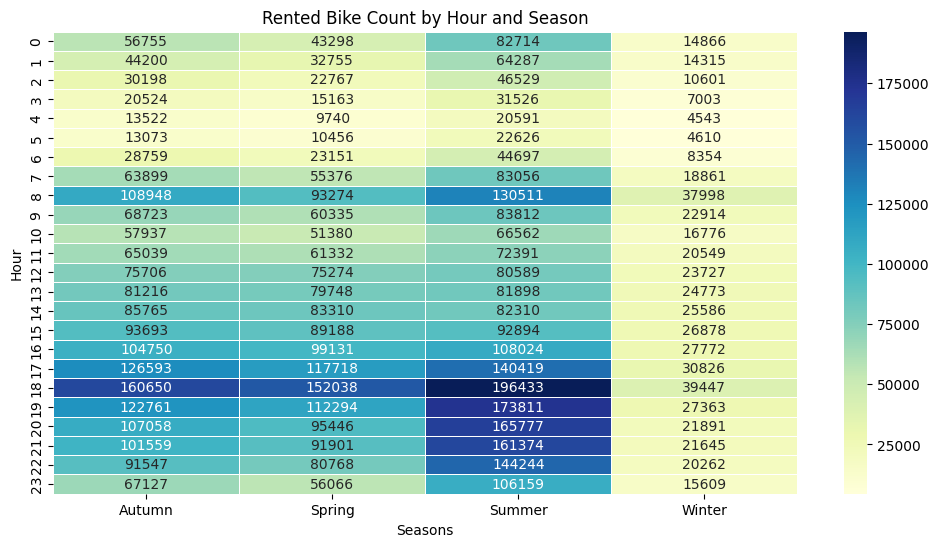

In [54]:
# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_season_rent_bike, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Rented Bike Count by Hour and Season')
plt.xlabel('Seasons')
plt.ylabel('Hour')
plt.show()

## Hour, Rented Bike Count for diffrent Seasons on holiday

In [55]:
holiday = df[df['Holiday'] == 'Holiday'].groupby('Hour')['Rented Bike Count'].sum().reset_index()
holiday

Hour  Rented Bike Count
0      0               8391
1      1               7080
2      2               5470
3      3               3822
4      4               2311
5      5               1602
6      6               2391
7      7               3857
8      8               6273
9      9               6826
10    10               7714
11    11               9180
12    12              11189
13    13              12648
14    14              13212
15    15              13460
16    16              14177
17    17              14949
18    18              14412
19    19              12995
20    20              12848
21    21              12210
22    22              10743
23    23               8135

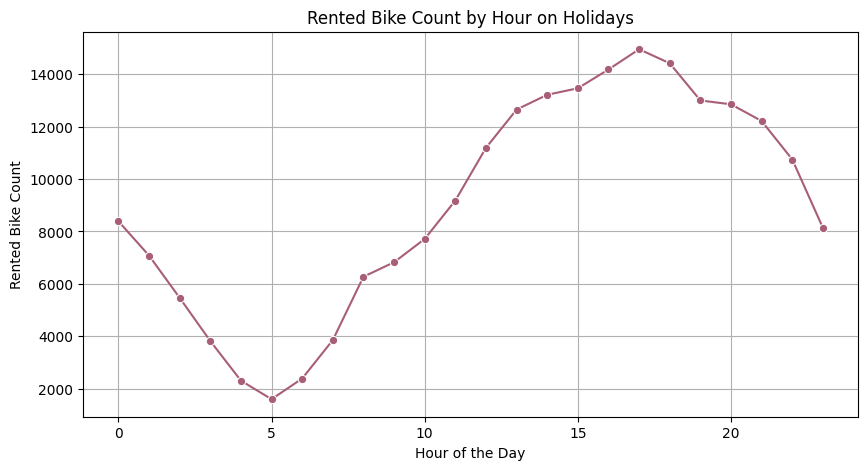

In [56]:
# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=holiday, x='Hour', y='Rented Bike Count', marker='o', color='#a85e74')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour on Holidays')
plt.grid(True)

# Show plot
plt.show()

# Hour, Rented Bike Count for diffrent Seasons on Not holiday

In [57]:
not_holiday = df[df['Holiday'] == 'No Holiday'].groupby('Hour')['Rented Bike Count'].sum().reset_index()
not_holiday

Hour  Rented Bike Count
0      0             189242
1      1             148477
2      2             104625
3      3              70394
4      4              46085
5      5              49163
6      6             102570
7      7             217335
8      8             364458
9      9             228958
10    10             184941
11    11             210131
12    12             244107
13    13             254987
14    14             263759
15    15             289193
16    16             325500
17    17             400607
18    18             534156
19    19             423234
20    20             377324
21    21             364269
22    22             326078
23    23             236826

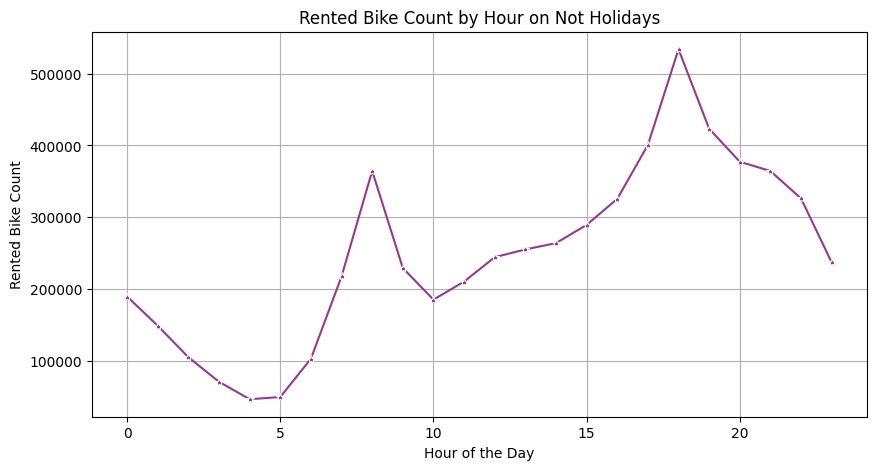

In [58]:
# Create line plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=not_holiday , x='Hour', y='Rented Bike Count', marker='*', color='#973794')

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.title('Rented Bike Count by Hour on Not Holidays')
plt.grid(True)

# Show plot
plt.show()

## Wind speed, Rented Bike Count for diffrent Seasons

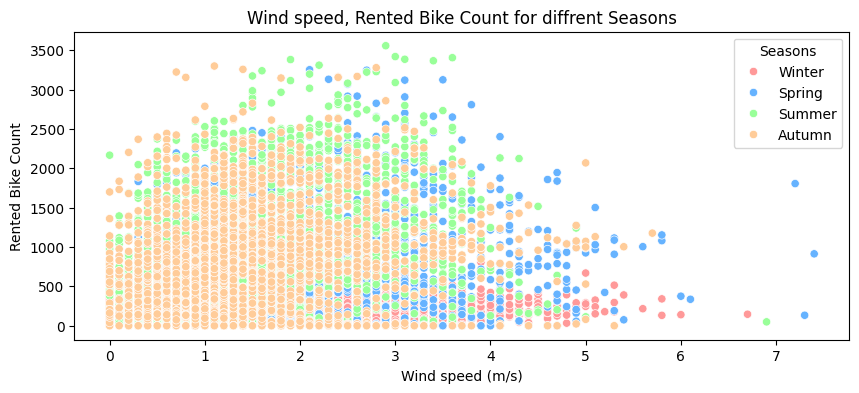

In [59]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Wind speed (m/s)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Wind speed, Rented Bike Count for diffrent Seasons')
plt.show()

## Visibility (10m), Rented Bike Count for diffrent Seasons

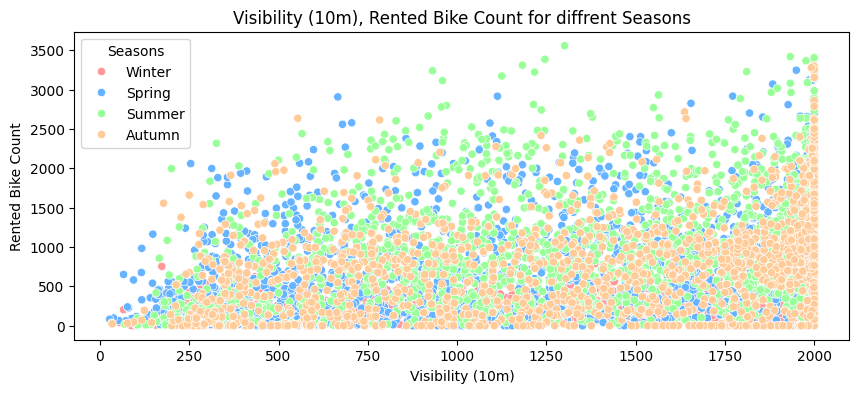

In [60]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Visibility (10m)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Visibility (10m), Rented Bike Count for diffrent Seasons')
plt.show()

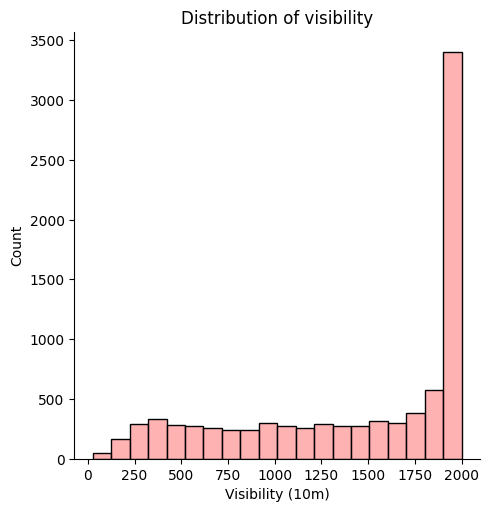

In [61]:
sns.displot(df['Visibility (10m)'], color='#ff9999')
plt.title('Distribution of visibility')
plt.show()

## RainFall Rented Bike ditribution by season

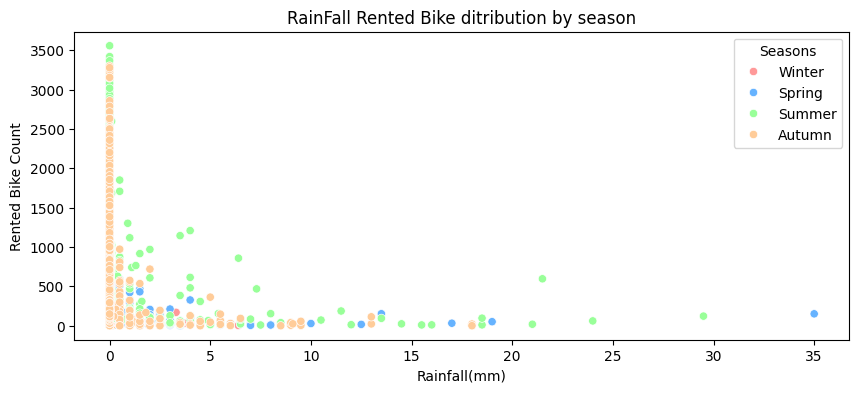

In [62]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('RainFall Rented Bike ditribution by season')
plt.show()

## SnowFall Rented Bike ditribution by season

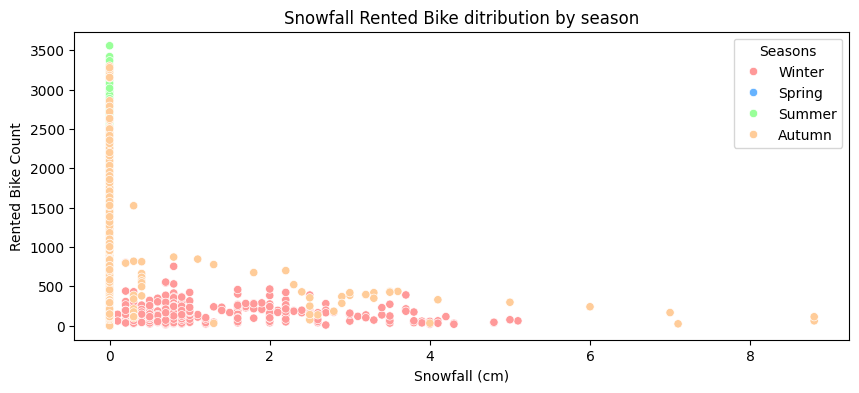

In [63]:
plt.figure(figsize=(10,4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Snowfall Rented Bike ditribution by season')
plt.show()

## Solar Radiation (MJ/m2) Rented Bike ditribution by season

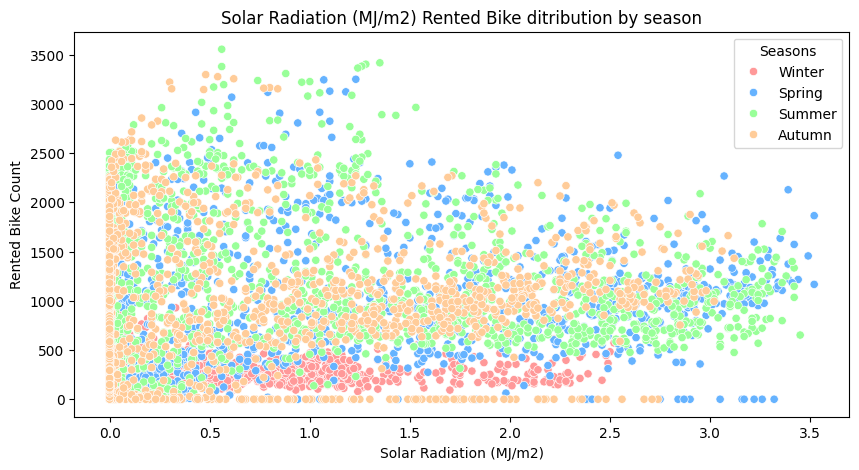

In [64]:
plt.figure(figsize=(10,5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Solar Radiation (MJ/m2) Rented Bike ditribution by season')
plt.show()

## Dew point temperature(°C) Rented Bike ditribution by season

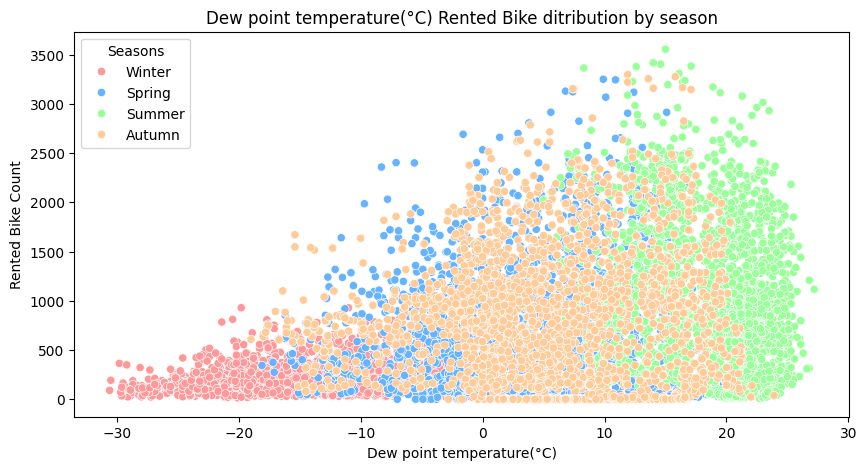

In [65]:
plt.figure(figsize=(10,5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.scatterplot(x = 'Dew point temperature(°C)', y = 'Rented Bike Count', data = df, hue = 'Seasons', palette = colors)
plt.title('Dew point temperature(°C) Rented Bike ditribution by season')
plt.show()

## Functional days

In [66]:
fun_day = df['Functioning Day'].value_counts().reset_index()
fun_day

Functioning Day  count
0             Yes   8465
1              No    295

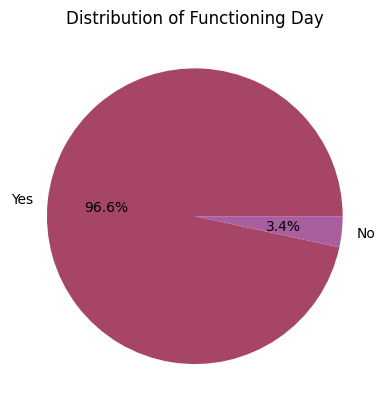

In [67]:
colors = ['#a64566','#a85e9f']
plt.pie(fun_day['count'], labels=fun_day['Functioning Day'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of Functioning Day')

## Total Rented Bike Count by Season on Functioning Days

In [68]:
yes_fun_day_bike_rent = df[df['Functioning Day'] == 'Yes'].groupby('Seasons')['Rented Bike Count'].sum().reset_index()
yes_fun_day_bike_rent

Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

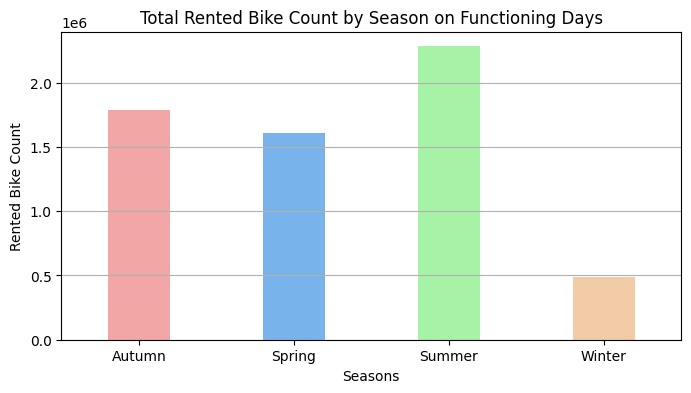

In [69]:
# Create bar plot
plt.figure(figsize=(8, 4))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
sns.barplot(data=yes_fun_day_bike_rent, x='Seasons', y='Rented Bike Count', palette=colors, width=0.4)

# Add labels and title
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Total Rented Bike Count by Season on Functioning Days')
plt.grid(axis='y')

# Show plot
plt.show()

In [70]:
no_fun_day_bike_rent = df[df['Functioning Day'] == 'No'].groupby('Seasons')['Rented Bike Count'].sum().reset_index()
no_fun_day_bike_rent

Seasons  Rented Bike Count
0  Autumn                  0
1  Spring                  0

In [71]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Date convert objects to date formate

In [72]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [73]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [74]:
df['Date'].dtypes

dtype('<M8[ns]')

## Years

In [75]:
df['year'] = df['Date'].dt.year
df['year'].value_counts().reset_index()

year  count
0  2018   8016
1  2017    744

## Month and Month name

In [76]:
df['month'] = df['Date'].dt.month
(df['month'].value_counts().reset_index()).sort_values(by='month', ascending=True)

month  count
1       1    744
11      2    672
2       3    744
7       4    720
3       5    744
8       6    720
4       7    744
5       8    744
9       9    720
6      10    744
10     11    720
0      12    744

## Month name

In [77]:
df['month_name'] = df['Date'].dt.month_name()
(df['month_name'].value_counts().reset_index()).sort_values(by='month_name', ascending=True)

month_name  count
7       April    720
5      August    744
0    December    744
11   February    672
1     January    744
4        July    744
8        June    720
2       March    744
3         May    744
10   November    720
6     October    744
9   September    720

## Week Days name

In [78]:
df['week_day']  = df['Date'].dt.day_name()
df['week_day'].value_counts().reset_index()

week_day  count
0     Friday   1272
1   Saturday   1248
2     Sunday   1248
3     Monday   1248
4    Tuesday   1248
5  Wednesday   1248
6   Thursday   1248

## Week days

In [79]:
df['weeks'] = df['Date'].dt.weekday
df['weeks'].value_counts().reset_index()

weeks  count
0      4   1272
1      5   1248
2      6   1248
3      0   1248
4      1   1248
5      2   1248
6      3   1248

## Month days

In [80]:
df['monthssday'] = df['Date'].dt.days_in_month
df['monthssday'].value_counts().reset_index()

monthssday  count
0          31   5208
1          30   2880
2          28    672

# days

In [81]:
df['days'] = df['Date'].dt.day
df['days'].value_counts().reset_index()

days  count
0      1    288
1      2    288
2     28    288
3     27    288
4     26    288
5     25    288
6     24    288
7     23    288
8     22    288
9     21    288
10    20    288
11    19    288
12    18    288
13    17    288
14    16    288
15    15    288
16    14    288
17    13    288
18    12    288
19    11    288
20    10    288
21     9    288
22     8    288
23     7    288
24     6    288
25     5    288
26     4    288
27     3    288
28    29    264
29    30    264
30    31    168

## Years Querter

In [82]:
df['querter'] = df['Date'].dt.quarter
df['querter'].value_counts().reset_index()

querter  count
0        4   2208
1        3   2208
2        2   2184
3        1   2160

## Distribution of years by Rented Bike Count

In [83]:
years = df.groupby('year')['Rented Bike Count'].sum().reset_index()
years

year  Rented Bike Count
0  2017             185330
1  2018            5986984

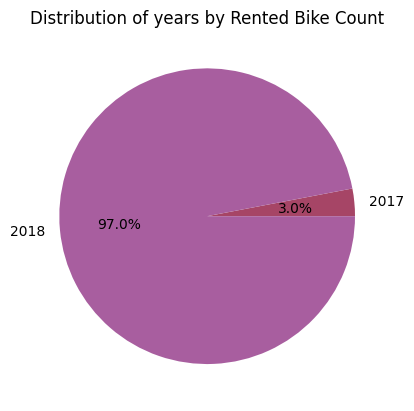

In [84]:
colors = ['#a64566','#a85e9f']
plt.pie(years['Rented Bike Count'], labels=years['year'], autopct='%1.1f%%', colors=colors)
_ = plt.title('Distribution of years by Rented Bike Count')

## Distribution of years by Seasons vs Rented Bike Count

In [85]:
years_seasion = df.groupby(['year','Seasons'])['Rented Bike Count'].sum().unstack()
years_seasion

Seasons     Autumn     Spring     Summer    Winter
year                                              
2017           NaN        NaN        NaN  185330.0
2018     1790002.0  1611909.0  2283234.0  301839.0

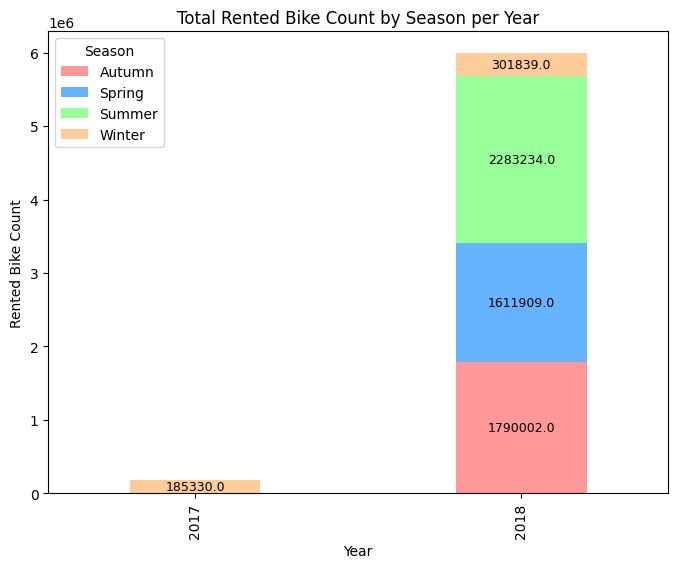

In [86]:
# Set the colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create a stacked bar chart
ax = years_seasion.plot(kind='bar', stacked=True, color=colors, figsize=(8,6), width=0.4)

# Set the title and labels
plt.title('Total Rented Bike Count by Season per Year')
plt.xlabel('Year')
plt.ylabel('Rented Bike Count')
plt.legend(title='Season')


# Add labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}', ha='center', va='center', fontsize=9, color='black')

# Display the plot
plt.show()

## Distribution of years by month vs Rented Bike Count

In [87]:
year_month = df.groupby(['year', 'month_name'])['Rented Bike Count'].sum().reset_index()
year_month

year month_name  Rented Bike Count
0   2017   December             185330
1   2018      April             524227
2   2018     August             651887
3   2018   February             151833
4   2018    January             150006
5   2018       July             734460
6   2018       June             896887
7   2018      March             380594
8   2018        May             707088
9   2018   November             465715
10  2018    October             650675
11  2018  September             673612

# Create the Pivot table and show the data using line chart

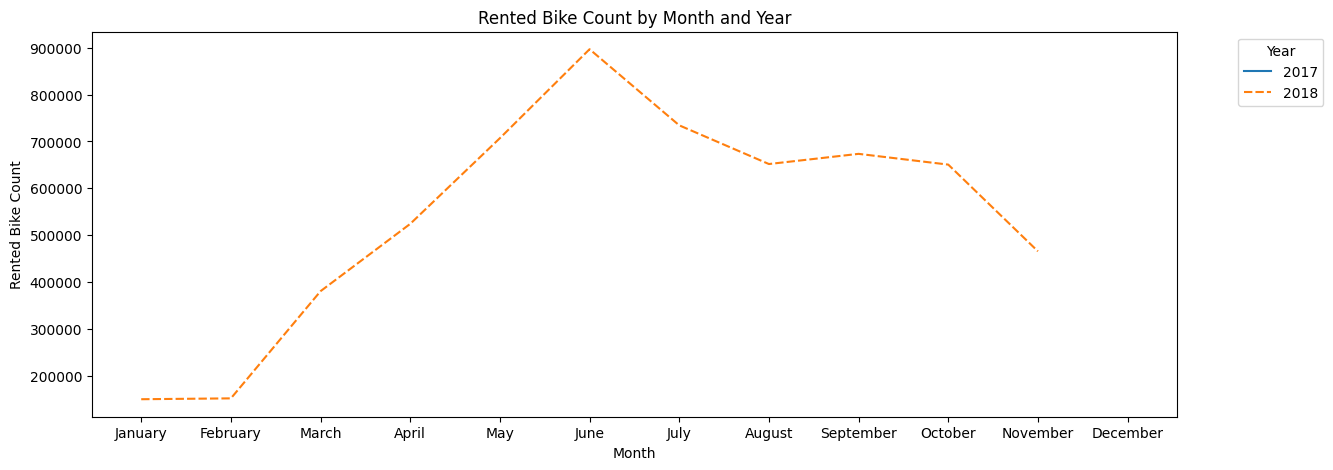

In [88]:
# Sort the months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month['month_name'] = pd.Categorical(year_month['month_name'], categories=months_order, ordered=True)

# Pivot the DataFrame for easier plotting
year_month_pivot = year_month.pivot(index='month_name', columns='year', values='Rented Bike Count')

# Set the figure size
plt.figure(figsize=(14, 5))

# Create a line plot
sns.lineplot(data=year_month_pivot)

# Set the title and labels
plt.title('Rented Bike Count by Month and Year')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

## Also show the ditribution using heat map

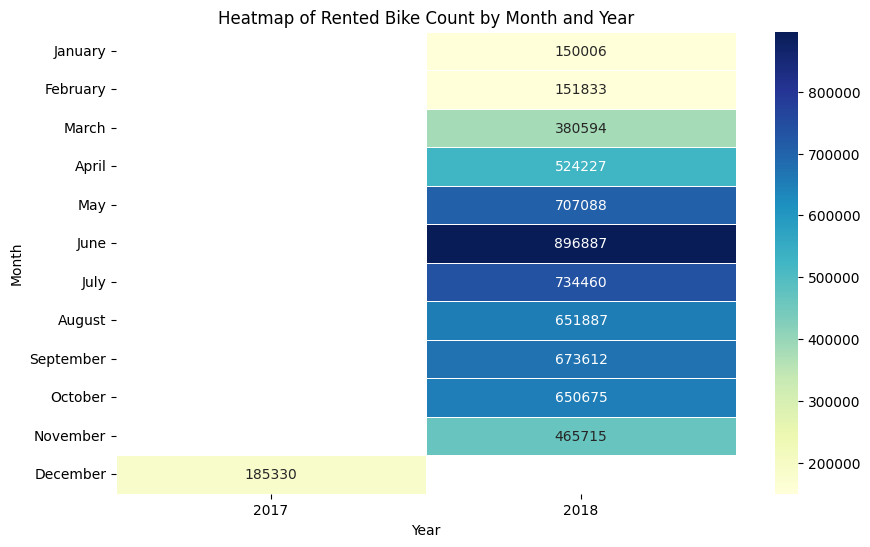

In [89]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(year_month_pivot, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)

# Set the title and labels
plt.title('Heatmap of Rented Bike Count by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')

# Display the plot
plt.show()

## Distribution of years by month vs Seasons Rented Bike Count

In [90]:
year_month_seasion = df.groupby(['year', 'month_name','Seasons'])['Rented Bike Count'].sum().reset_index()
year_month_seasion

year month_name Seasons  Rented Bike Count
0   2017   December  Winter             185330
1   2018      April  Spring             524227
2   2018     August  Summer             651887
3   2018   February  Winter             151833
4   2018    January  Winter             150006
5   2018       July  Summer             734460
6   2018       June  Summer             896887
7   2018      March  Spring             380594
8   2018        May  Spring             707088
9   2018   November  Autumn             465715
10  2018    October  Autumn             650675
11  2018  September  Autumn             673612

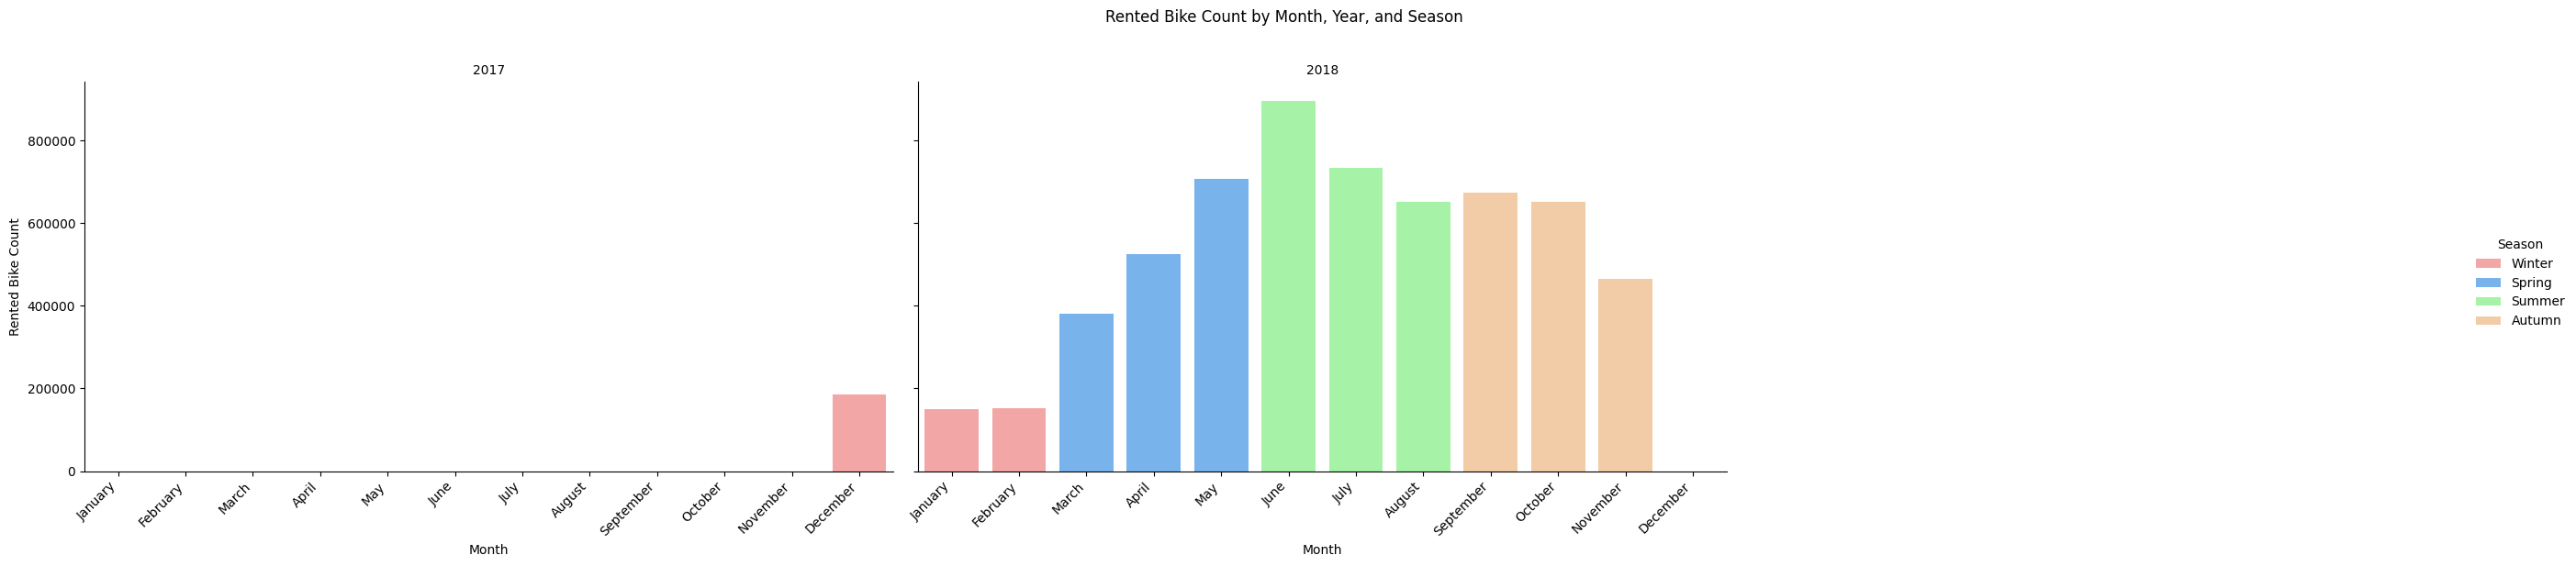

In [91]:
# Sort the months correctly
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
year_month_seasion['month_name'] = pd.Categorical(year_month_seasion['month_name'], categories=months_order, ordered=True)

#Set the colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Set the figure size
g = sns.FacetGrid(year_month_seasion, col="year", hue="Seasons", palette=colors, col_wrap=3, height=6, aspect=1.5)

# Create the bar plot
g.map(sns.barplot, "month_name", "Rented Bike Count", order=months_order)

# Add the legend and titles
g.add_legend(title='Season')
g.set_axis_labels("Month", "Rented Bike Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Rented Bike Count by Month, Year, and Season', y=1.02)

# Rotate month labels for better readability
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

# Display the plot
plt.tight_layout()
plt.show()

## Distribution of years of querter vs Seasons Rented Bike Count

In [92]:
year_querter = df.groupby(['year', 'querter','Seasons'])['Rented Bike Count'].sum().unstack()
year_querter

Seasons          Autumn     Spring     Summer    Winter
year querter                                           
2017 4              NaN        NaN        NaN  185330.0
2018 1              NaN   380594.0        NaN  301839.0
     2              NaN  1231315.0   896887.0       NaN
     3         673612.0        NaN  1386347.0       NaN
     4        1116390.0        NaN        NaN       NaN

## Rented Bike Count by Quarter, Year, and Season

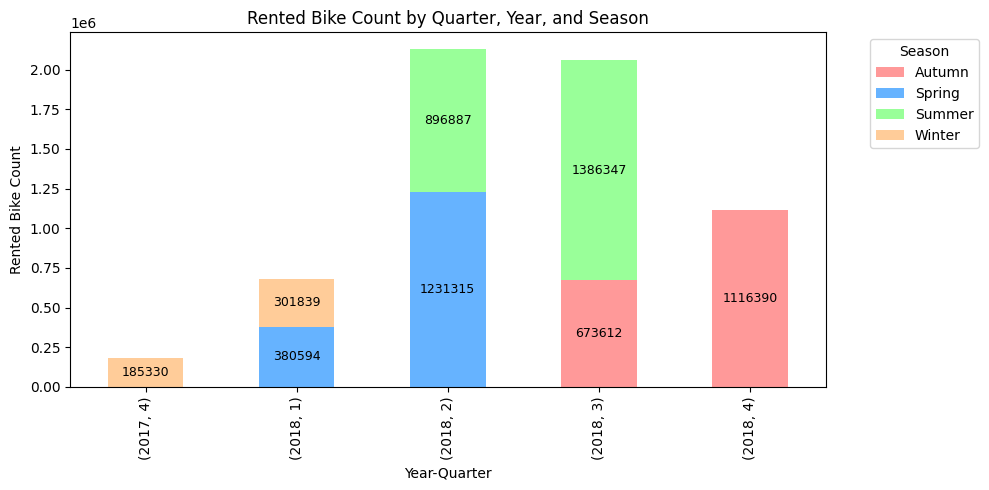

In [93]:
# Set the colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create a stacked bar chart
ax = year_querter.plot(kind='bar', stacked=True, color=colors, figsize=(10, 5))

# Set the title and labels
plt.title('Rented Bike Count by Quarter, Year, and Season')
plt.xlabel('Year-Quarter')
plt.ylabel('Rented Bike Count')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{height:.0f}', ha='center', va='center', fontsize=9, color='black')

# Display the plot
plt.tight_layout()
plt.show()

## Rented Bike Count by Weekday and Season

In [94]:
Season_days = df.groupby(['week_day','Seasons'])['Rented Bike Count'].sum().unstack()
Season_days

Seasons    Autumn  Spring  Summer  Winter
week_day                                 
Friday     225767  251299  391559   81709
Monday     299146  252481  288431   71685
Saturday   264718  225077  330517   65180
Sunday     236071  200854  290242   53027
Thursday   261294  204262  327016   69427
Tuesday    211353  254152  316285   76806
Wednesday  291653  223784  339184   69335

## Heatmap of Rented Bike Count by Weekday and Season

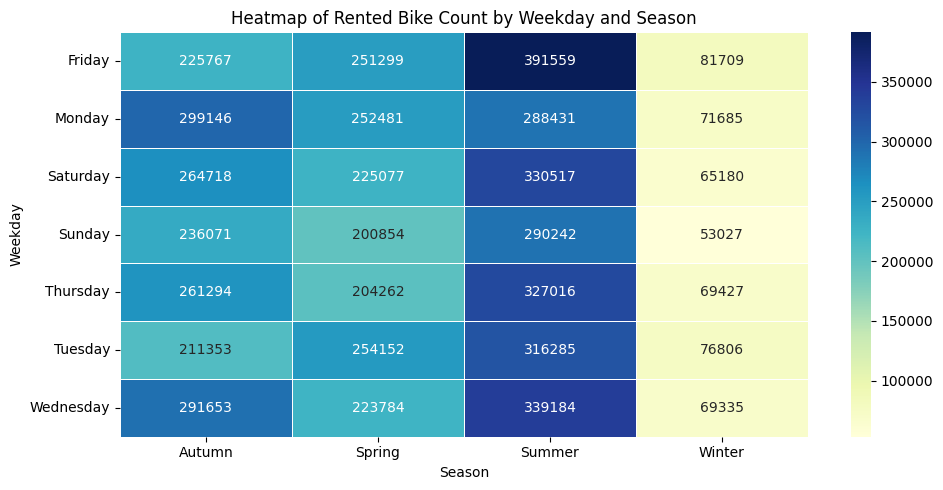

In [95]:
# Reorder weekdays for better readability
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
season_days = Season_days.reindex(weekdays_order)

# Set the figure size
plt.figure(figsize=(10, 5))

# Create a heatmap
sns.heatmap(Season_days, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)

# Set the title and labels
plt.title('Heatmap of Rented Bike Count by Weekday and Season')
plt.xlabel('Season')
plt.ylabel('Weekday')

# Display the plot
plt.tight_layout()
plt.show()

## Rented Bike Count by Weekday and Season using stack bar chart

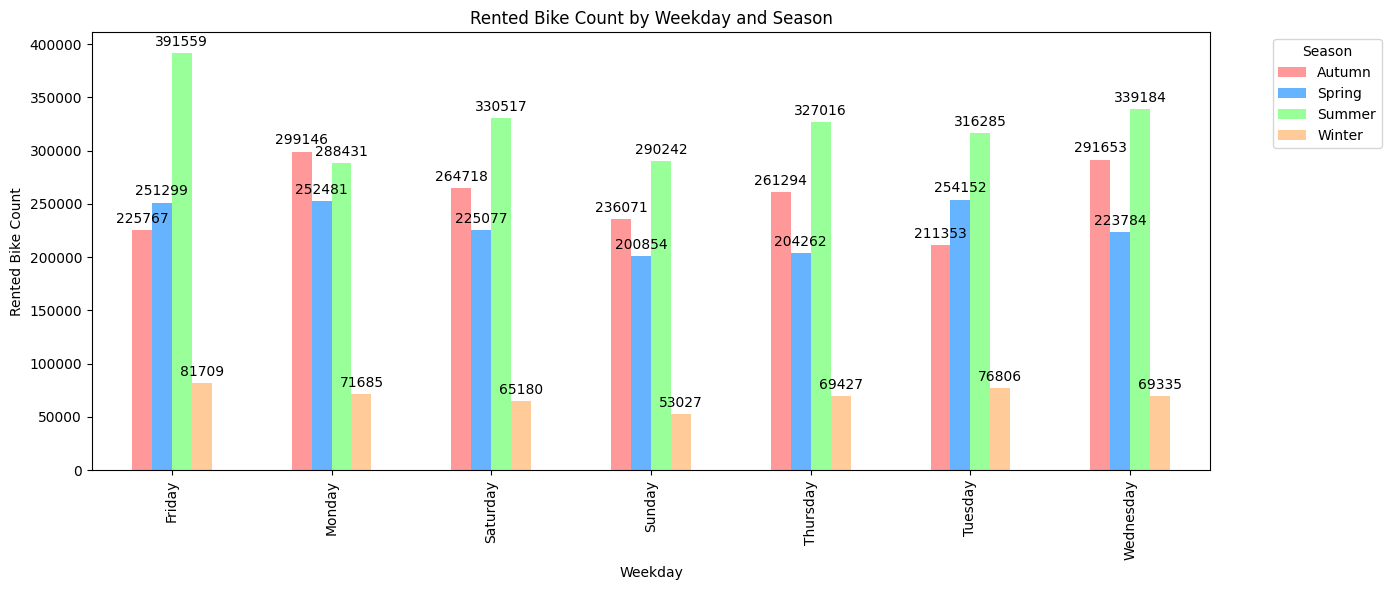

In [96]:
# Set the colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create a grouped bar chart
ax = Season_days.plot(kind='bar', color=colors, figsize=(14, 6))

# Set the title and labels
plt.title('Rented Bike Count by Weekday and Season')
plt.xlabel('Weekday')
plt.ylabel('Rented Bike Count')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Display the plot
plt.tight_layout()
plt.show()

## Correlation

In [97]:
dff = df.drop(columns=['Date','weeks','monthssday','days'])

In [98]:
# Find the Correlation
object_columns = dff.select_dtypes(include=['object']).columns
df_numeric = dff.drop(columns=object_columns)


## Correlation Heatmap

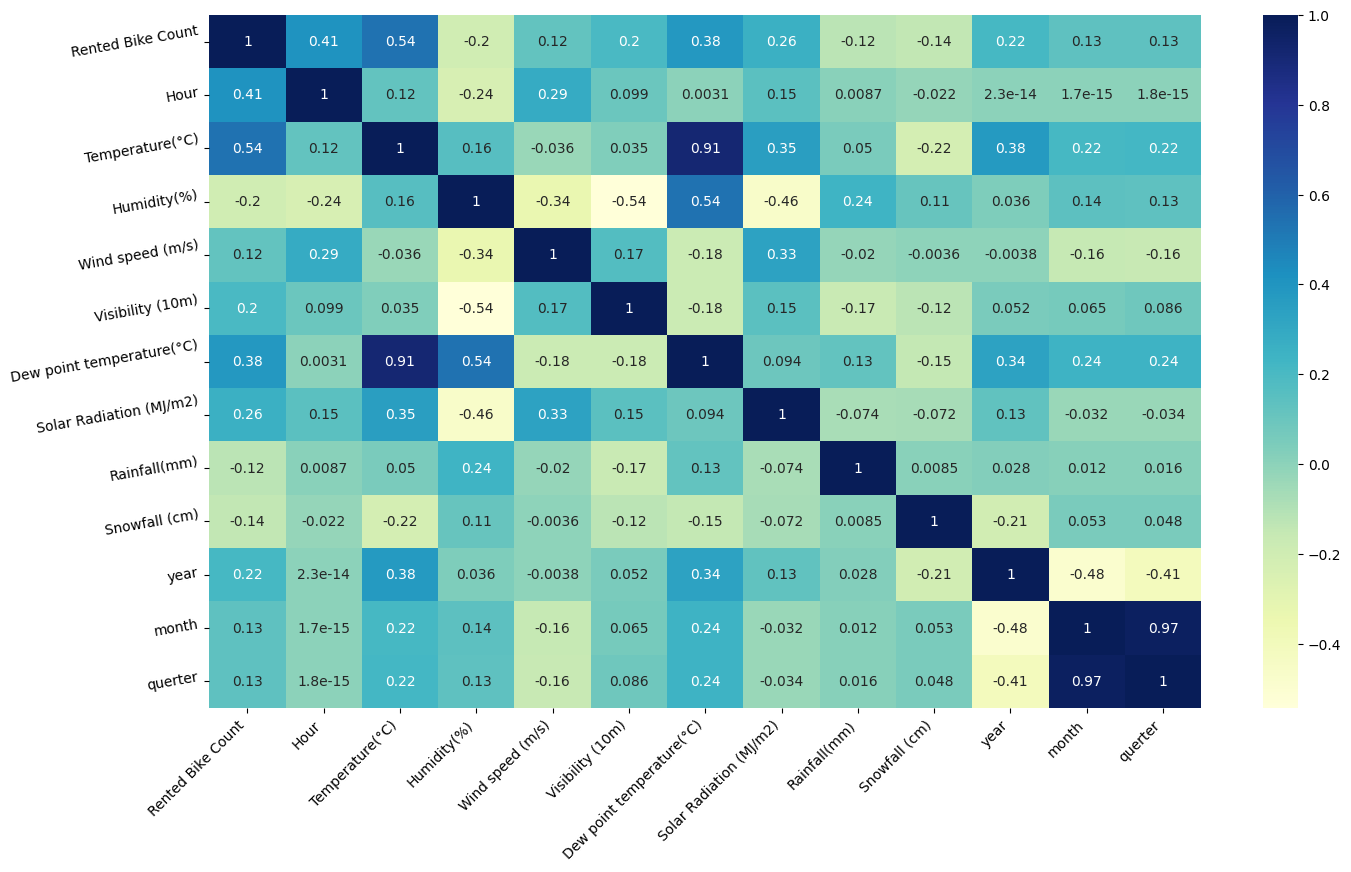

In [99]:
# Correlation Heatmap visualization code
plt.figure(figsize=(16, 9))

dataplot = sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot=True) # Multivariant analysis

plt.xticks(rotation=45, ha='right')

plt.yticks(rotation=10, ha='right')

# displaying heatmap
plt.show()

## Distribution using pairplot

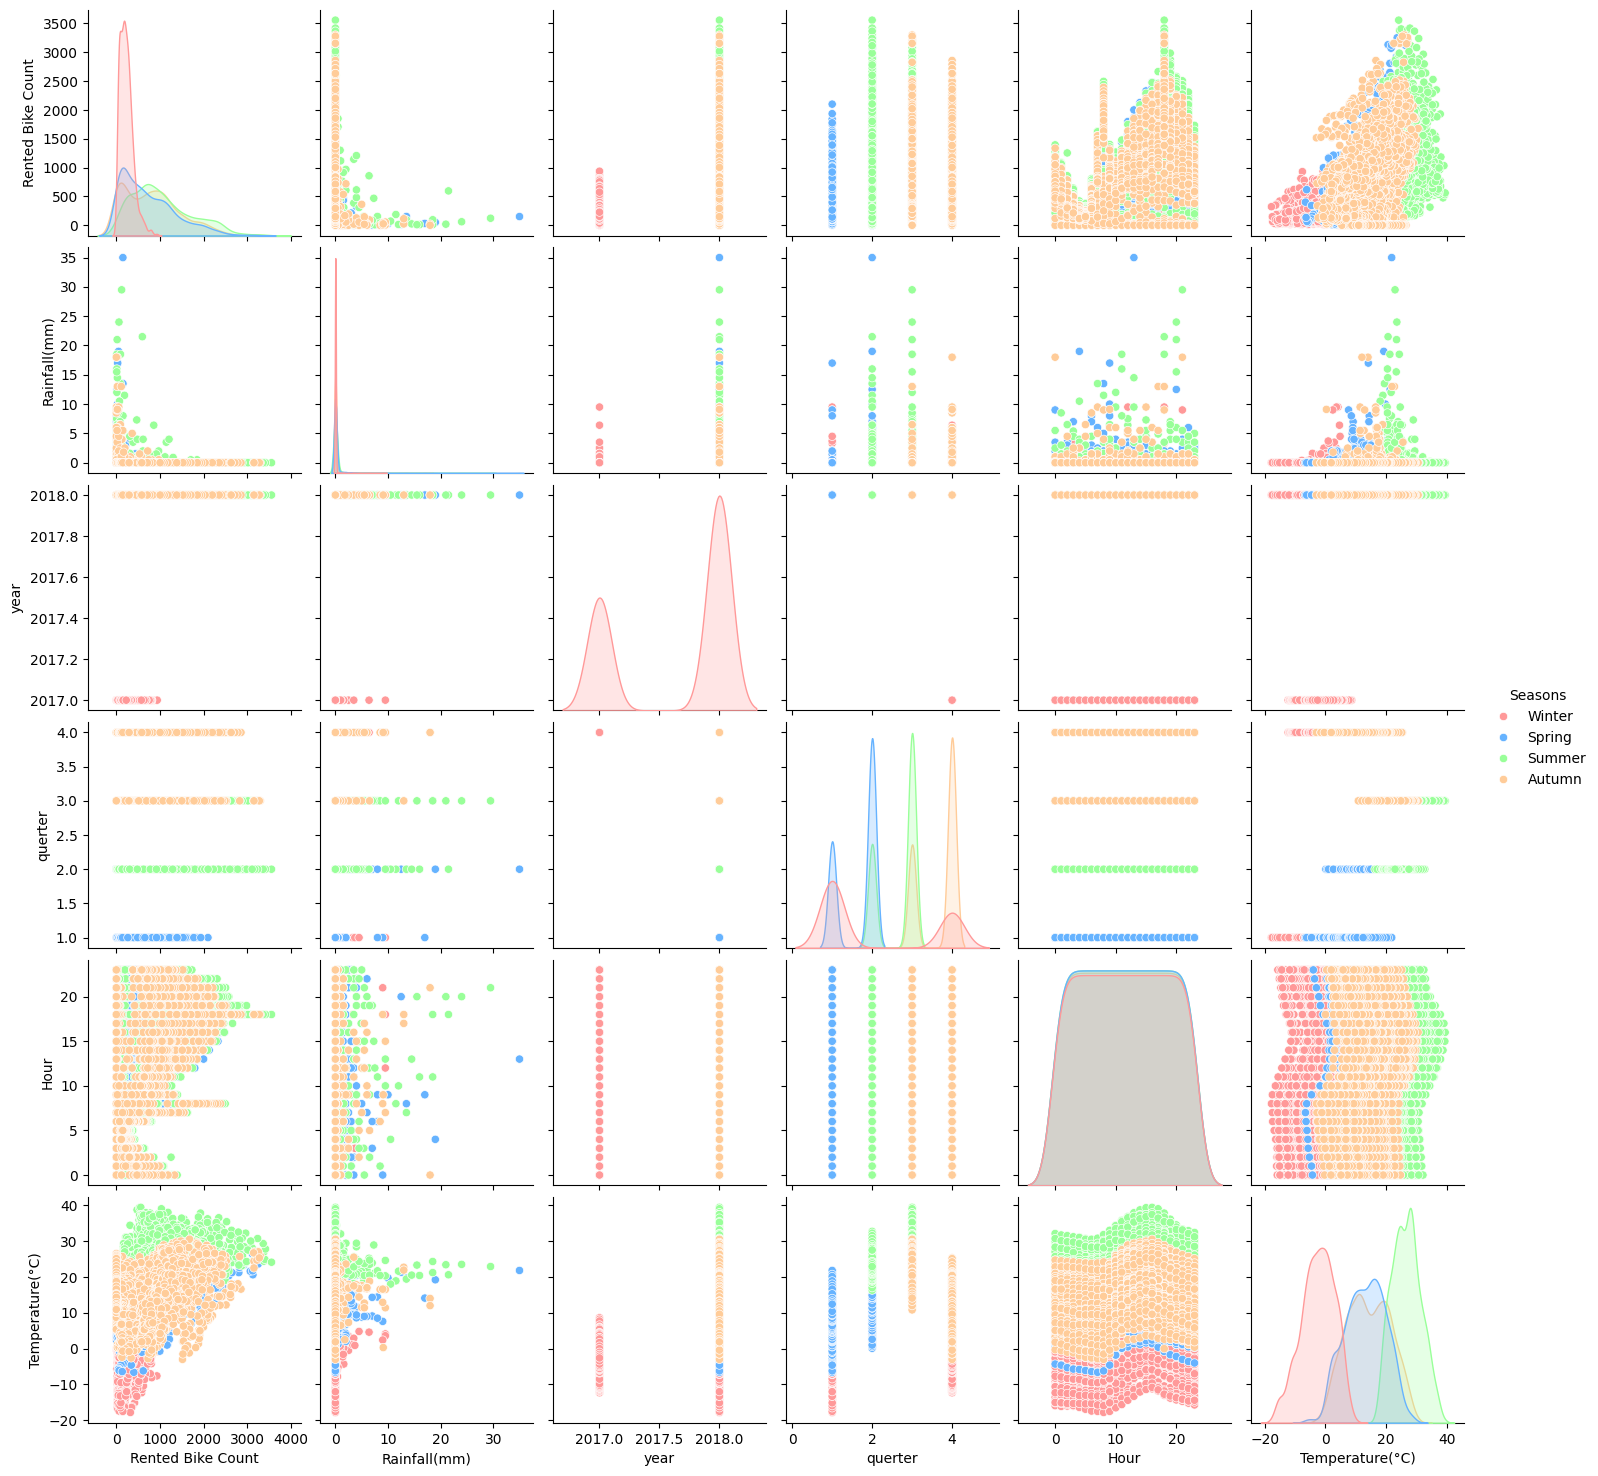

In [100]:
# Pairplot
# Set the color
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Select the columns
desired_columns = ['Seasons','Rented Bike Count', 'Rainfall(mm)', 'year', 'month_name', 'querter','Holiday','Hour','Temperature(°C)']
subset_dff = dff[desired_columns]

# Create the Pairplot
sns.pairplot(subset_dff, hue='Seasons', diag_kind="kde", palette=colors, height=2.5)
plt.show()

## Feature Engineering

In [101]:
num_features = df.describe().columns
num_features

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year',
       'month', 'weeks', 'monthssday', 'days', 'querter'],
      dtype='object')

## Correlation & Scatter plot 'Ranted Bike Count'

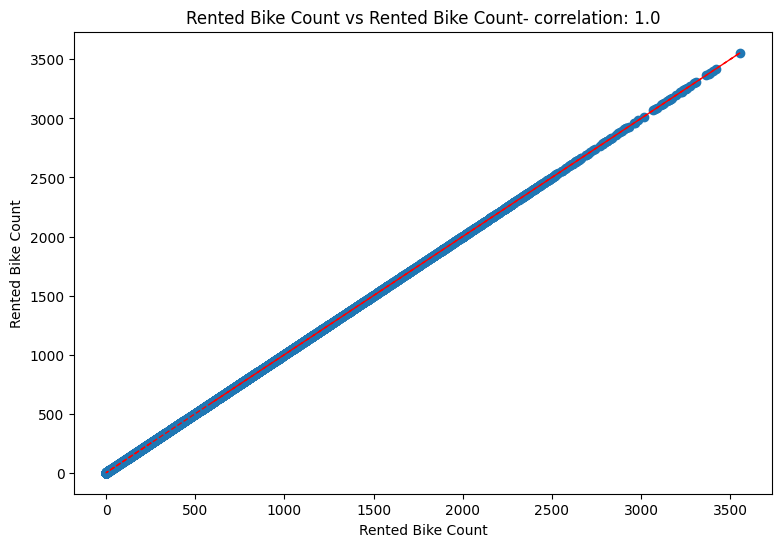

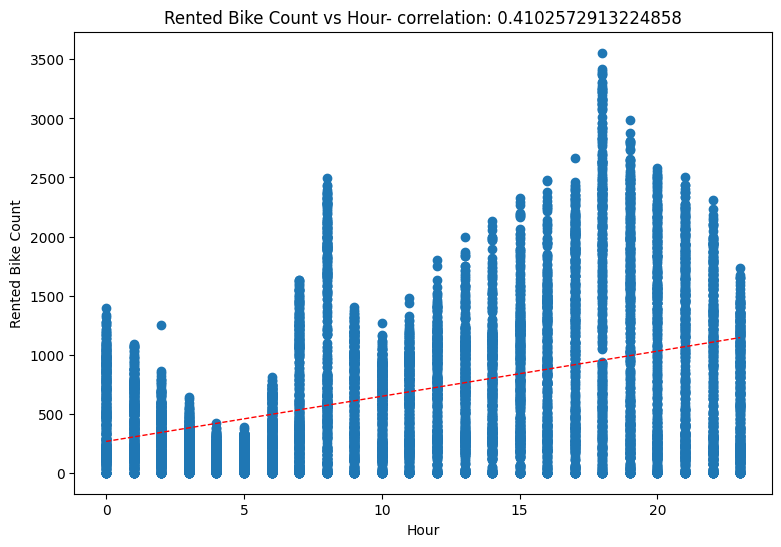

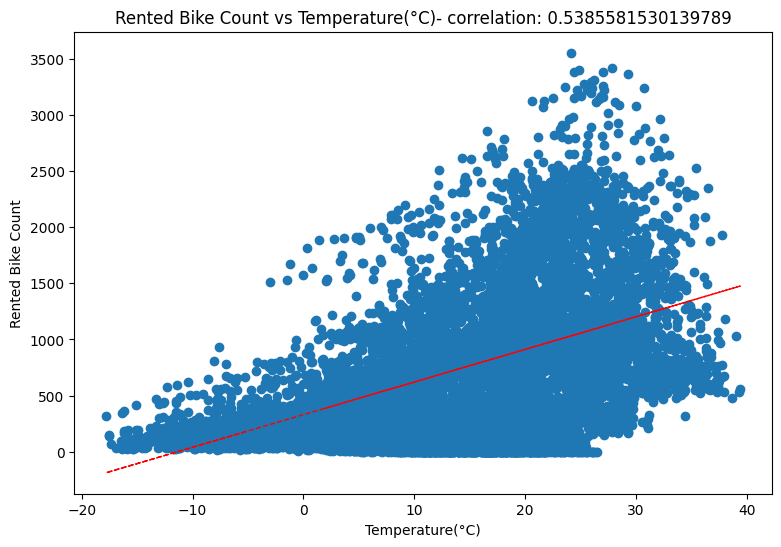

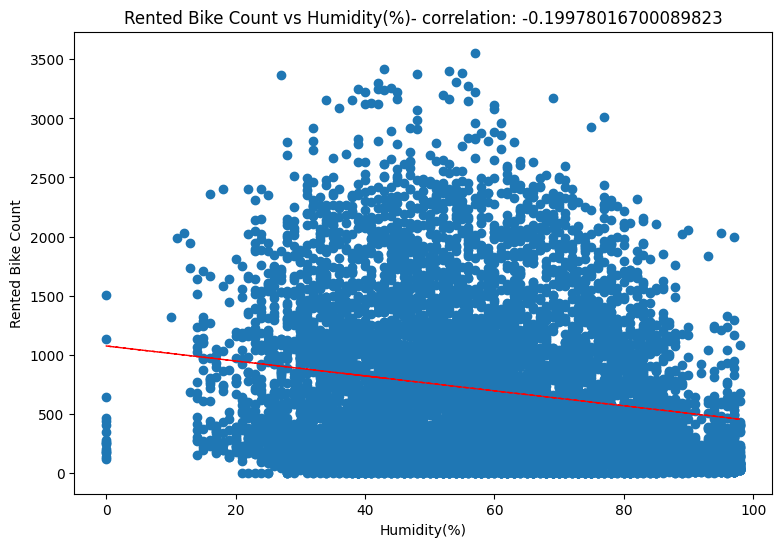

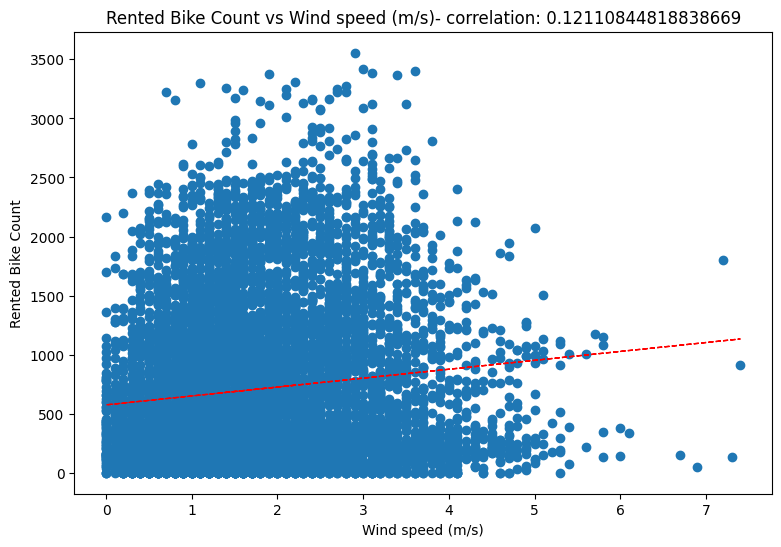

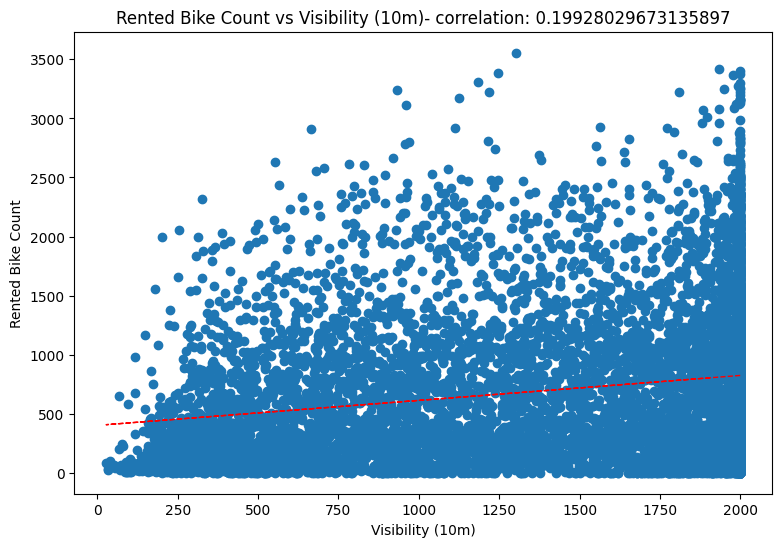

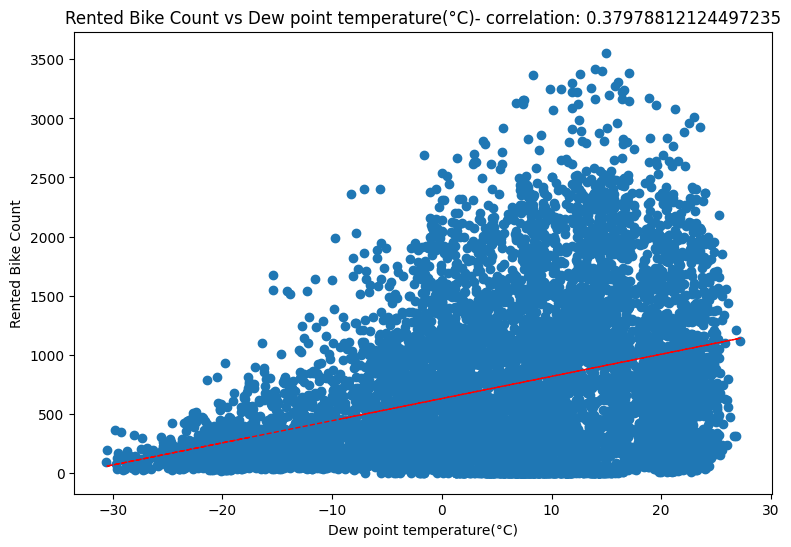

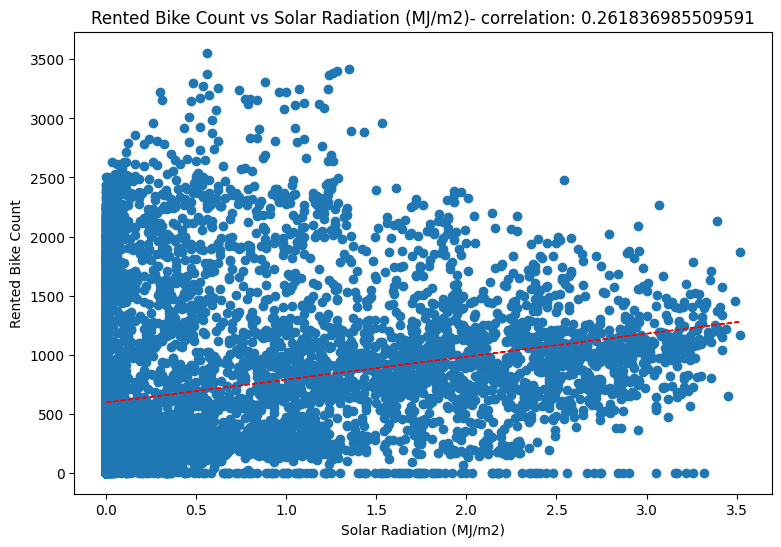

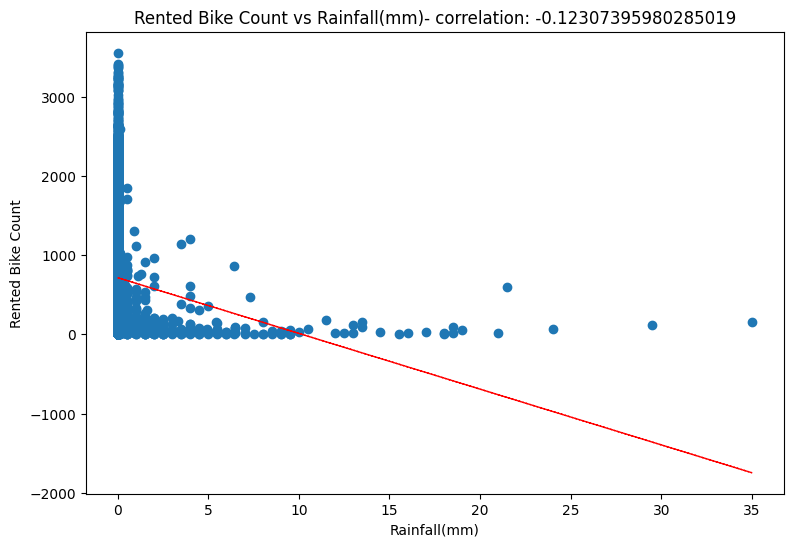

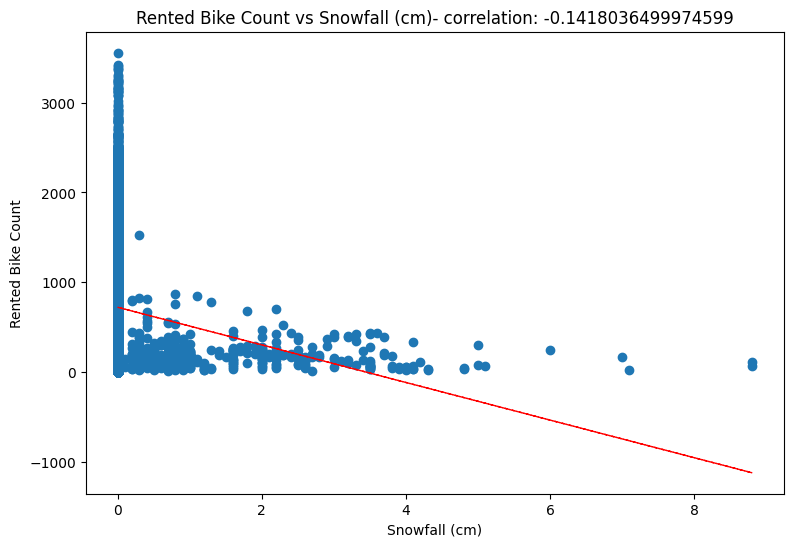

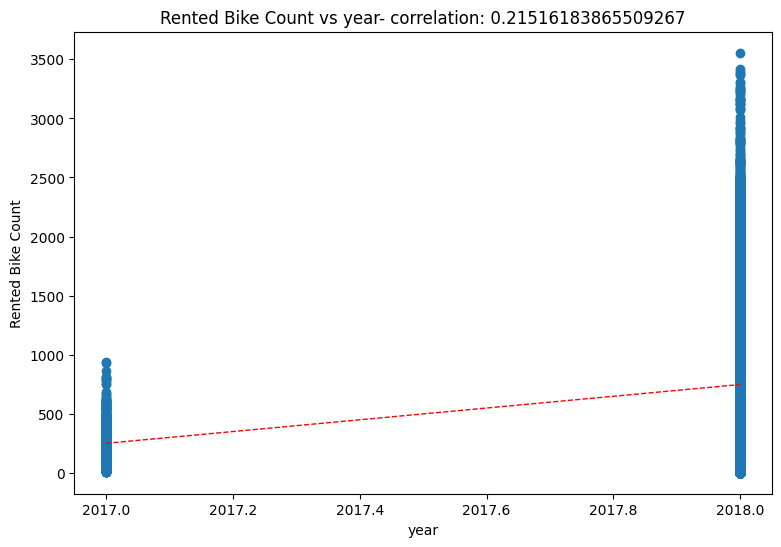

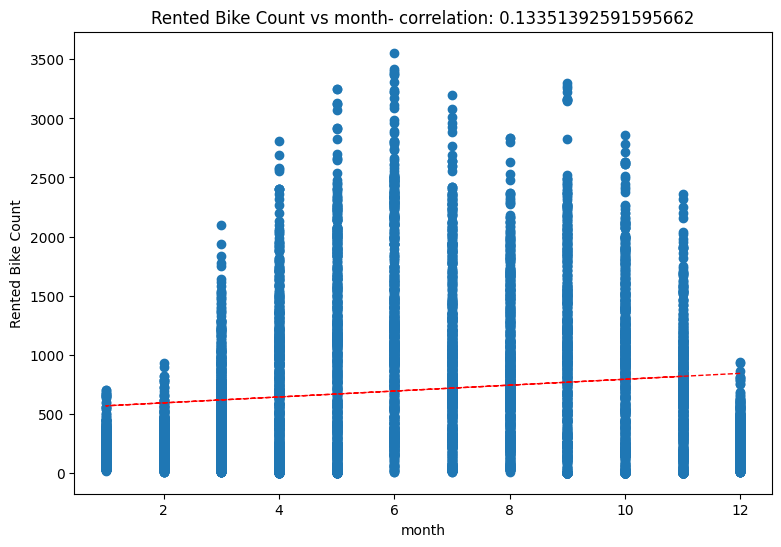

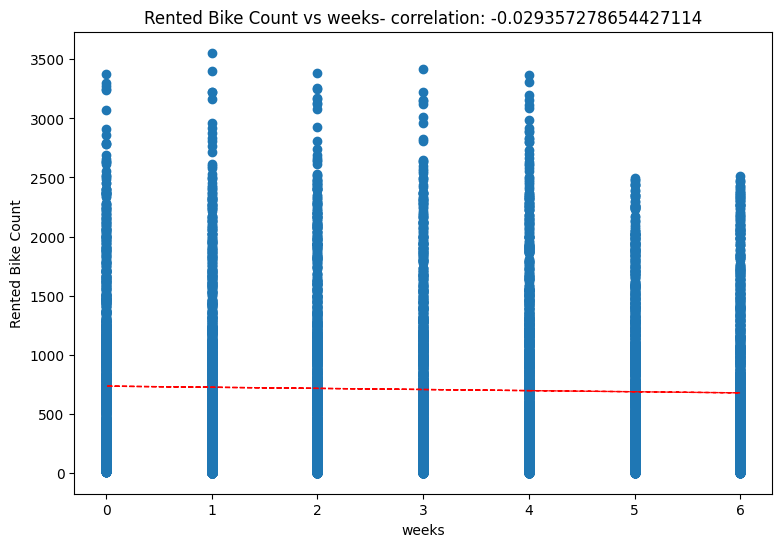

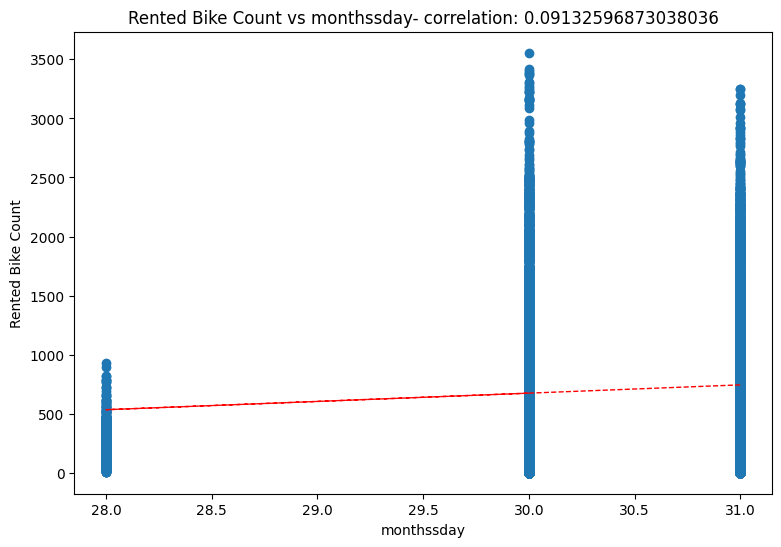

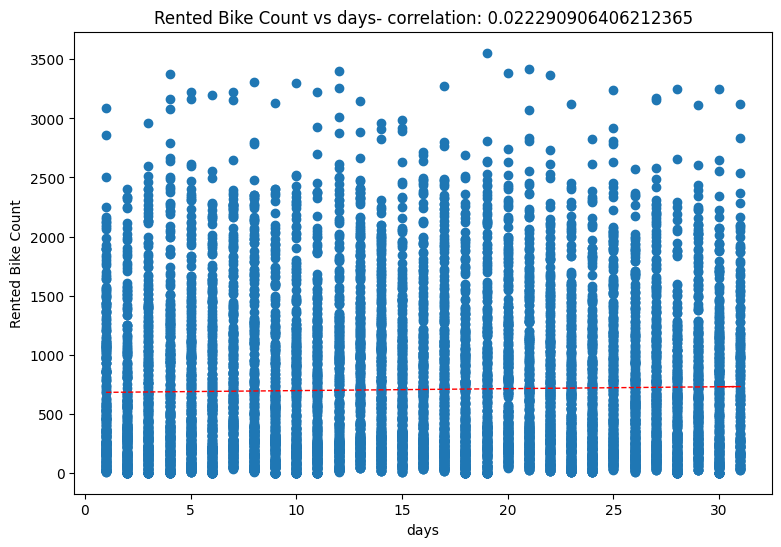

In [102]:
for col in num_features[1:-1]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Rented Bike Count')
  ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))


  z = np.polyfit(df[col], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, 'r--', lw = 1)

## Outlayer dataset

In [103]:
df['Date'] = pd.to_datetime(df['Date'])

In [104]:
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].map(lambda x: x.year).astype('object')


df.drop(columns = ['Date'],inplace = True)

In [105]:
df['day_of_week'].value_counts()

day_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

## creating new feature week day and weekend

## Lable encoding

In [106]:
df['week'] = df['day_of_week'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekdays')
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  ...  year     month month_name week_day weeks  \
0           0.0            0.0  ...  2017  December   December   Friday     4   
1           0.0            0.0  ...  2017  December   December   Friday     4   
2           0.0            0.0  ...  2017  December   December   Friday     4   
3           0.0            0.0  ...  2017  December   December   Friday     4   
4           0.0            0.0  ...  2017  December   December   Friday     4   

  monthssday days  querter  day_of_week      week  
0         31    1        4       Friday  Weekdays  
1         31    1        4       Friday  Weekdays  
2         31    1        4       Friday  Weekdays  
3         31    1        4       Friday  Weekdays  
4         31    1        4       Friday  Weekdays  

[5 rows x 23 columns]

In [107]:
df['week'].value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

## Distribution of Ranted bike count of each hour in weekdays and weekend

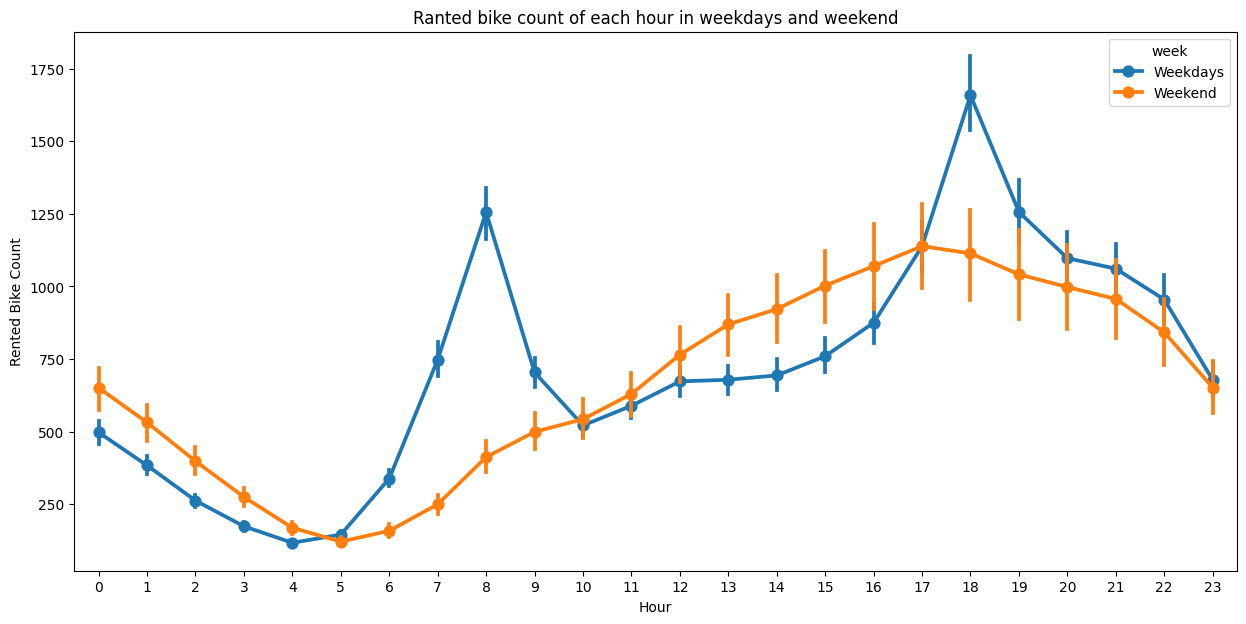

In [108]:
plt.figure(figsize=(15,7))
sns.pointplot(x = df['Hour'],y = df['Rented Bike Count'],hue = df['week'])
plt.title('Ranted bike count of each hour in weekdays and weekend')
plt.show()

In [109]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'month_name', 'week_day',
       'weeks', 'monthssday', 'days', 'querter', 'day_of_week', 'week'],
      dtype='object')

## Feature Selections

In [110]:
df.drop(columns = ['day_of_week','month_name','week_day','weeks', 'monthssday', 'days', 'querter'], inplace = True)

In [111]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'week'],
      dtype='object')

## **Do some Feature engineering on hour columns**

In [112]:
def hour(h):
  if h>=11 and h<=16:
    return "Noon"
  elif h>=7 and h<=10:
    return "Morining"
  elif h>=17 and h<=22:
    return "Evening"
  else:
    return "Night"


In [113]:
df['Hour'] = df['Hour'].apply(hour)


In [114]:
df['Hour'].value_counts()

Hour
Night       2920
Noon        2190
Evening     2190
Morining    1460
Name: count, dtype: int64

## Feature Selection

In [115]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['Rented Bike Count']), df['Rented Bike Count'], test_size = 0.2, random_state = 0)

In [116]:
df.shape, X_train.shape, X_test.shape

((8760, 16), (7008, 15), (1752, 15))

##Check the correlations for all numerical columns

In [117]:
int_columns_df = df.select_dtypes(include=['int','float'])
int_columns_df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  
3           0.0            0.0  
4           0.0            0.0

In [118]:
int_columns_df.corr()

Rented Bike Count  Temperature(°C)  Humidity(%)  \
Rented Bike Count                   1.000000         0.538558    -0.199780   
Temperature(°C)                     0.538558         1.000000     0.159371   
Humidity(%)                        -0.199780         0.159371     1.000000   
Wind speed (m/s)                    0.121108        -0.036252    -0.336683   
Visibility (10m)                    0.199280         0.034794    -0.543090   
Dew point temperature(°C)           0.379788         0.912798     0.536894   
Solar Radiation (MJ/m2)             0.261837         0.353505    -0.461919   
Rainfall(mm)                       -0.123074         0.050282     0.236397   
Snowfall (cm)                      -0.141804        -0.218405     0.108183   

                           Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count                  0.121108          0.199280   
Temperature(°C)                   -0.036252          0.034794   
Humidity(%)                       -0.336683         -0.543090   
Wind speed (m/s)                   1.000000          0.171507   
Visibility (10m)                   0.171507          1.000000   
Dew point temperature(°C)         -0.176486         -0.176630   
Solar Radiation (MJ/m2)            0.332274          0.149738   
Rainfall(mm)                      -0.019674         -0.167629   
Snowfall (cm)                     -0.003554         -0.121695   

                           Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
Rented Bike Count                           0.379788                 0.261837   
Temperature(°C)                             0.912798                 0.353505   
Humidity(%)                                 0.536894                -0.461919   
Wind speed (m/s)                           -0.176486                 0.332274   
Visibility (10m)                           -0.176630                 0.149738   
Dew point temperature(°C)                   1.000000                 0.094381   
Solar Radiation (MJ/m2)                     0.094381                 1.000000   
Rainfall(mm)                                0.125597                -0.074290   
Snowfall (cm)                              -0.150887                -0.072301   

                           Rainfall(mm)  Snowfall (cm)  
Rented Bike Count             -0.123074      -0.141804  
Temperature(°C)                0.050282      -0.218405  
Humidity(%)                    0.236397       0.108183  
Wind speed (m/s)              -0.019674      -0.003554  
Visibility (10m)              -0.167629      -0.121695  
Dew point temperature(°C)      0.125597      -0.150887  
Solar Radiation (MJ/m2)       -0.074290      -0.072301  
Rainfall(mm)                   1.000000       0.008500  
Snowfall (cm)                  0.008500       1.000000

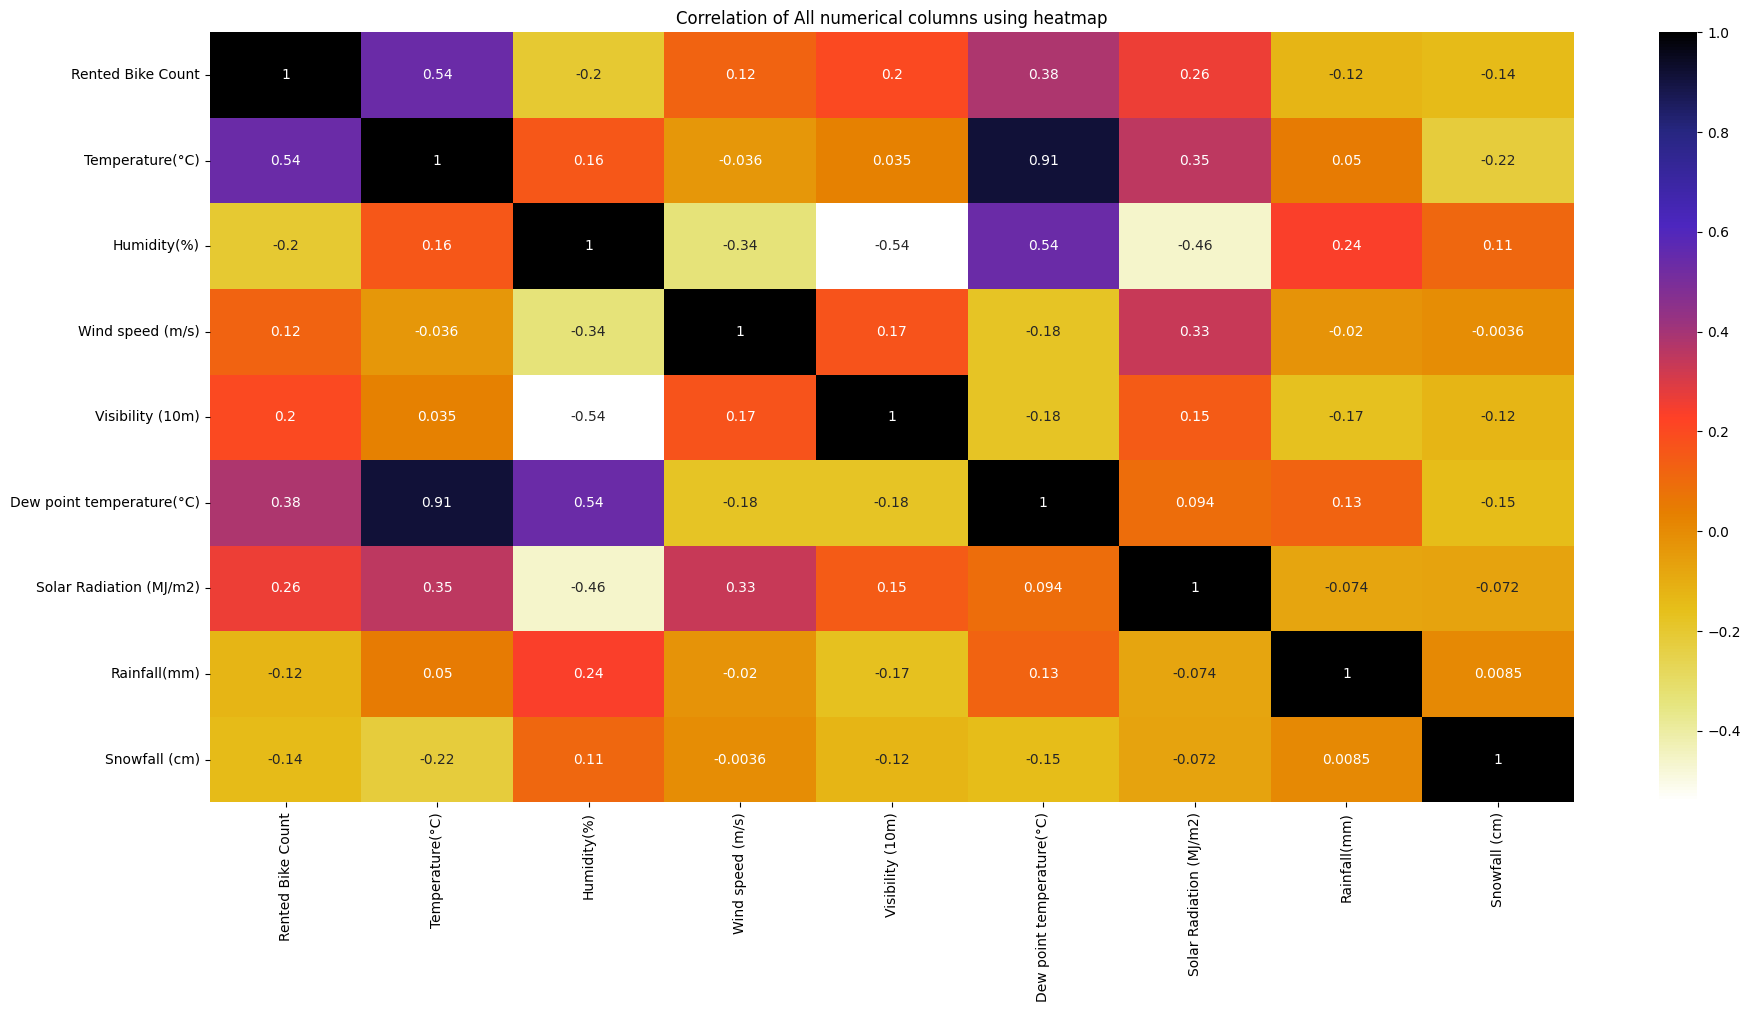

In [119]:
plt.figure(figsize = (22,10))
sns.heatmap(int_columns_df.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.title('Correlation of All numerical columns using heatmap')
plt.show()

**Dew point temperature(°C) and Temperature(°C) are highlly corelated**

## Heard Code for all projects uses

In [120]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [121]:
len(correlation(int_columns_df,0.9))

1

##Check for VIF

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

In [123]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

In [124]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

## Feature Scaling

In [125]:
new_df = pd.get_dummies(df, drop_first = True, sparse = True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   Rented Bike Count          8760 non-null   int64              
 1   Temperature(°C)            8760 non-null   float64            
 2   Humidity(%)                8760 non-null   int64              
 3   Wind speed (m/s)           8760 non-null   float64            
 4   Visibility (10m)           8760 non-null   int64              
 5   Dew point temperature(°C)  8760 non-null   float64            
 6   Solar Radiation (MJ/m2)    8760 non-null   float64            
 7   Rainfall(mm)               8760 non-null   float64            
 8   Snowfall (cm)              8760 non-null   float64            
 9   Hour_Morining              1 non-null      Sparse[bool, False]
 10  Hour_Night                 1 non-null      Sparse[bool, False]
 11  Hour

In [126]:
X = new_df.drop(columns = ['Rented Bike Count'])
y = np.sqrt(new_df['Rented Bike Count'])

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [128]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

yeo = PowerTransformer()

x_train = yeo.fit_transform(x_train)
x_test = yeo.transform(x_test)

## Model Implementation

## Create a function for Scores Heard Code for all regresion model uses

In [129]:
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]



def score_metrix (model,X_train,X_test,Y_train,Y_test):


  model.fit(X_train,Y_train)


  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:

    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass




  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)


    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)


    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)


    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)



    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:

    Y_pred = model.predict(X_test)


    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)


    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)



    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)

    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:


      best = model.best_estimator_
      features = X_train.columns
      importances = best.feature_importances_
      indices = np.argsort(importances)
      plt.figure(figsize=(10,15))
      plt.title('Feature Importance')
      plt.barh(range(len(indices)), importances[indices], color='red', align='center')
      plt.yticks(range(len(indices)), [features[i] for i in indices])
      plt.xlabel('Relative Importance')
      plt.show()

    except:
      pass


  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)

  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)


  try:

    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

## Linear Regression

Training score  = 0.7531796877853747
MAE : 4.847051132393038
MSE : 38.112190245491924
RMSE : 6.173507126868157
R2 : 0.7481776450601112
Adjusted R2 :  0.7447966967761961 

********************************************************************************
coefficient 
 [ 7.67514371 -0.76272096  0.26081557  0.55319026 -2.30189478  0.69381339
 -3.06956908  0.05456189 -1.89995704 -5.20284882 -3.69878542 -0.19179707
 -0.15888947 -1.02704466  0.67845312  5.36249652  0.08338371 -1.01952447
 -0.08338371 -0.88903834 -0.65293803 -0.3297387   1.12356016 -0.52539296
  0.64168955  0.64080349  1.07641171  0.40015852 -0.65650252]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


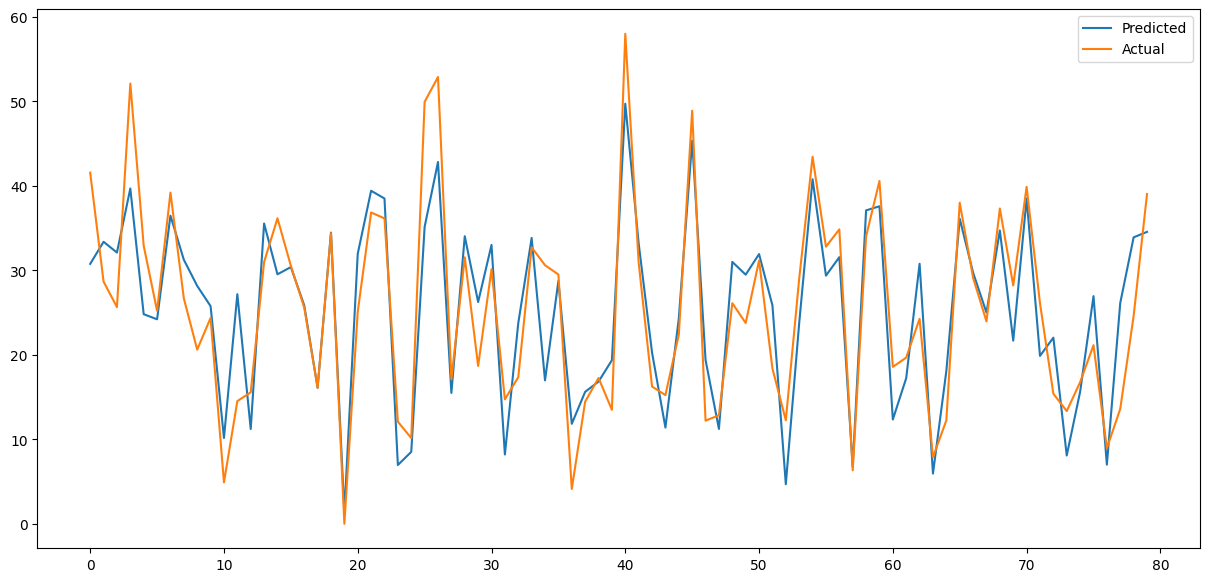

In [130]:
score_metrix(LinearRegression(),x_train,x_test,y_train,y_test)

## Cross validation

In [131]:
pt = PowerTransformer()

In [132]:

X_transformed = pt.fit_transform(X)

In [133]:
lr = LinearRegression()
cross_val_score(lr, X_transformed, y, cv=10).mean()

-7.057679318682157e+22

## Ridge

Training score  = 0.7531787751622295
MAE : 4.846466598657682
MSE : 38.11178048857902
RMSE : 6.173473940058305
R2 : 0.7481803524865303
Adjusted R2 :  0.7447994405523216 

********************************************************************************
coefficient 
 [ 7.5817111  -0.80582005  0.26057527  0.55209938 -2.19007734  0.6955712
 -3.06889693  0.0549455  -1.89968783 -5.2014747  -3.69637373 -0.18770439
 -0.16250634 -1.02825411  0.67803041  5.36158781  0.08341363 -1.02221702
 -0.08341363 -0.88918508 -0.65464426 -0.33266923  1.12355688 -0.52641425
  0.63827074  0.6422092   1.0776525   0.39857656 -0.65497819]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


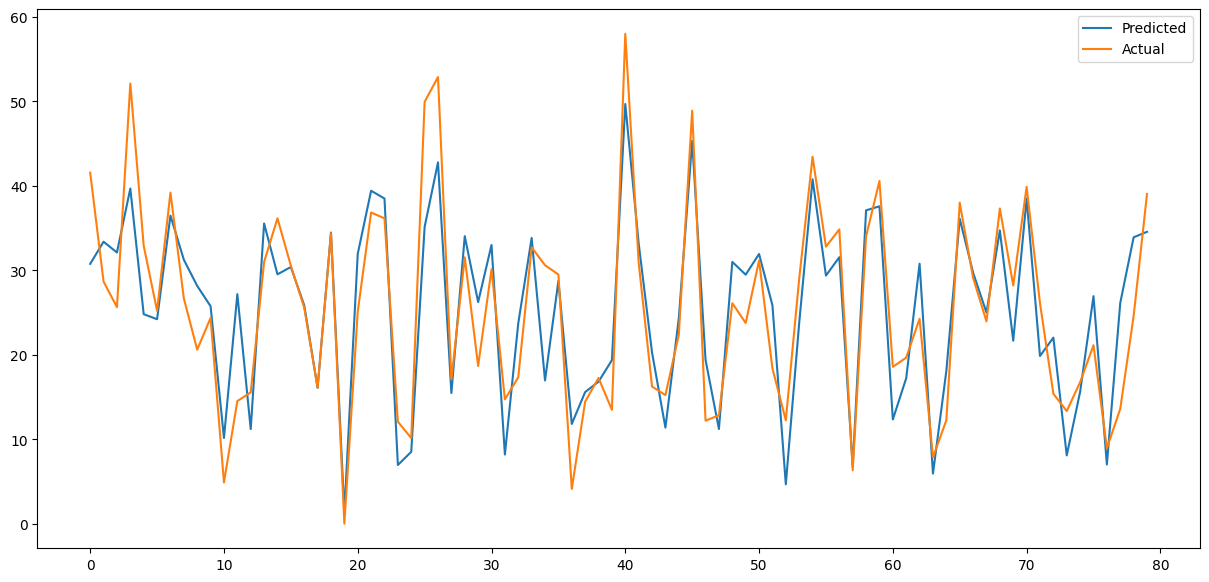

In [134]:
score_metrix(Ridge(),x_train,x_test,y_train,y_test)

## Lasso

Training score  = 0.6488583179116536
MAE : 5.656986840862352
MSE : 51.851908687320616
RMSE : 7.200826944686327
R2 : 0.6573938766136997
Adjusted R2 :  0.6527940721793466 

********************************************************************************
coefficient 
 [ 4.29042087 -0.85742662  0.          0.24401412  0.          0.
 -2.38606146 -0.         -0.         -3.20587158 -0.18411632 -0.
  0.         -1.89124338  0.          3.89154996  0.         -0.
 -0.         -0.         -0.         -0.          0.40386029 -0.
  0.          0.          0.          0.         -0.        ]


Intercept  =  23.442819487037085


******************** ploting the graph of Actual and predicted only with 80 observation ********************


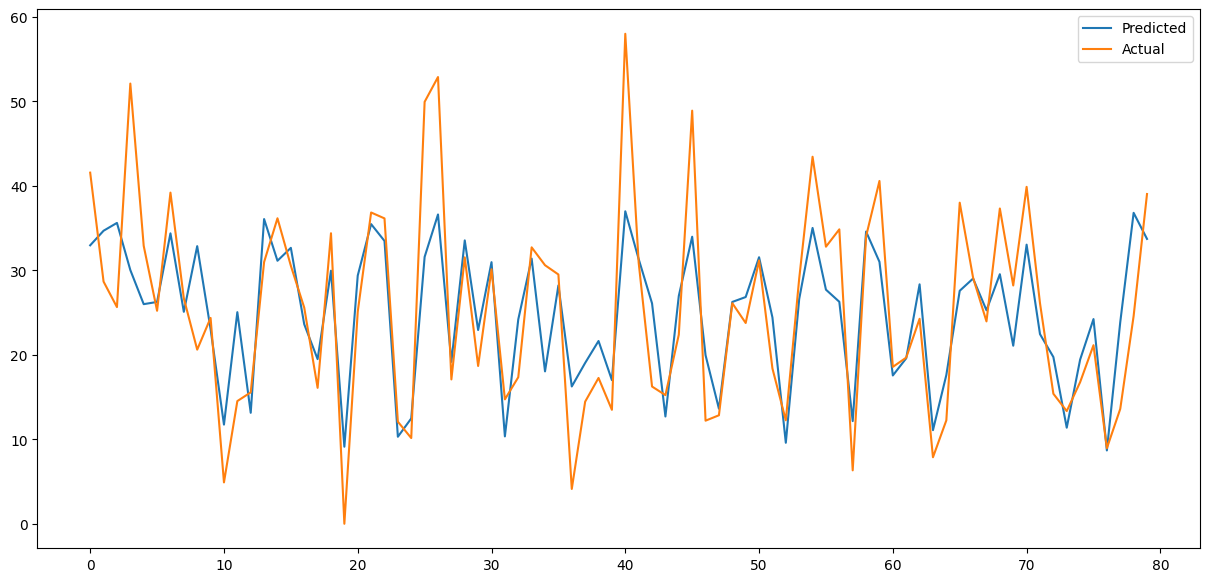

In [135]:
score_metrix(Lasso(),x_train,x_test,y_train,y_test)

## Minmaxscaler uses

In [136]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [137]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

mms = MinMaxScaler()

x_train1 = mms.fit_transform(x_train1)
x_test1 = mms.transform(x_test1)

Training score  = 0.729479622809946
MAE : 5.053287818921685
MSE : 44.476701490106464
RMSE : 6.669085506282436
R2 : 0.7061247953199992
Adjusted R2 :  0.7021792485904992 

********************************************************************************
coefficient 
 [ 16.83771371 -21.18706236   1.44824825   1.90349698  18.09516867
  -1.63644157 -45.34998168   0.1627629   -3.8631517  -10.83789033
  -7.09701995  -1.11388743  -1.90125573  -3.0644789    3.17933132
  29.22172249  -0.34372603  -4.76366147   0.34372603  -2.09128836
  -1.31691657  -1.67992011   4.54232585  -0.62581003   1.67571242
   2.64274004   3.29733721   0.13954482  -1.36945484]


Intercept  =  -8.245279566908458


******************** ploting the graph of Actual and predicted only with 80 observation ********************


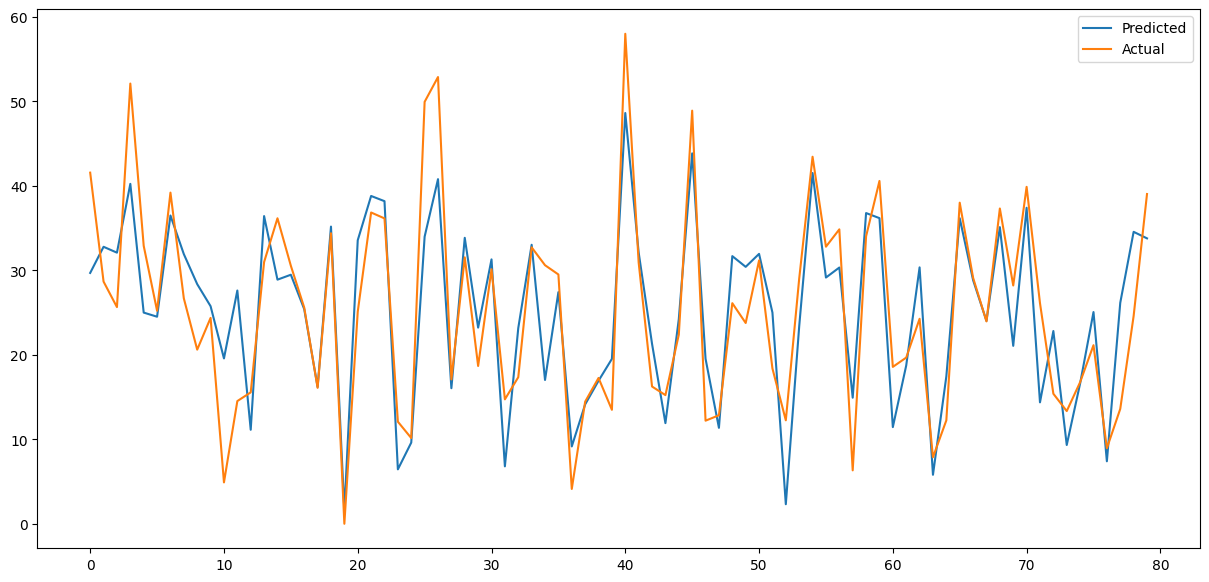

In [138]:
score_metrix(LinearRegression(),x_train1,x_test1,y_train1,y_test1)

## Using Standard scaler

In [139]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [140]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

sd = StandardScaler()

x_train2 = sd.fit_transform(x_train2)
x_test2 = sd.transform(x_test2)

Training score  = 0.729479622809946
MAE : 5.053287818921687
MSE : 44.47670149010648
RMSE : 6.669085506282438
R2 : 0.7061247953199992
Adjusted R2 :  0.7021792485904992 

********************************************************************************
coefficient 
 [ 3.50398028 -4.41296709  0.20230081  0.58979349  4.06133806 -0.40773323
 -1.88411494  0.00835147 -1.43865892 -5.10316828 -3.09431695 -0.20540648
 -0.46782931 -0.77966288  0.69640543  5.33704331 -0.0117292  -1.37851869
  0.0117292  -0.71742044 -0.52924982 -0.51925557  1.19275659 -0.17615307
  0.47167969  0.90438495  1.12013233  0.21404465 -0.61814701]


Intercept  =  23.442819487037088


******************** ploting the graph of Actual and predicted only with 80 observation ********************


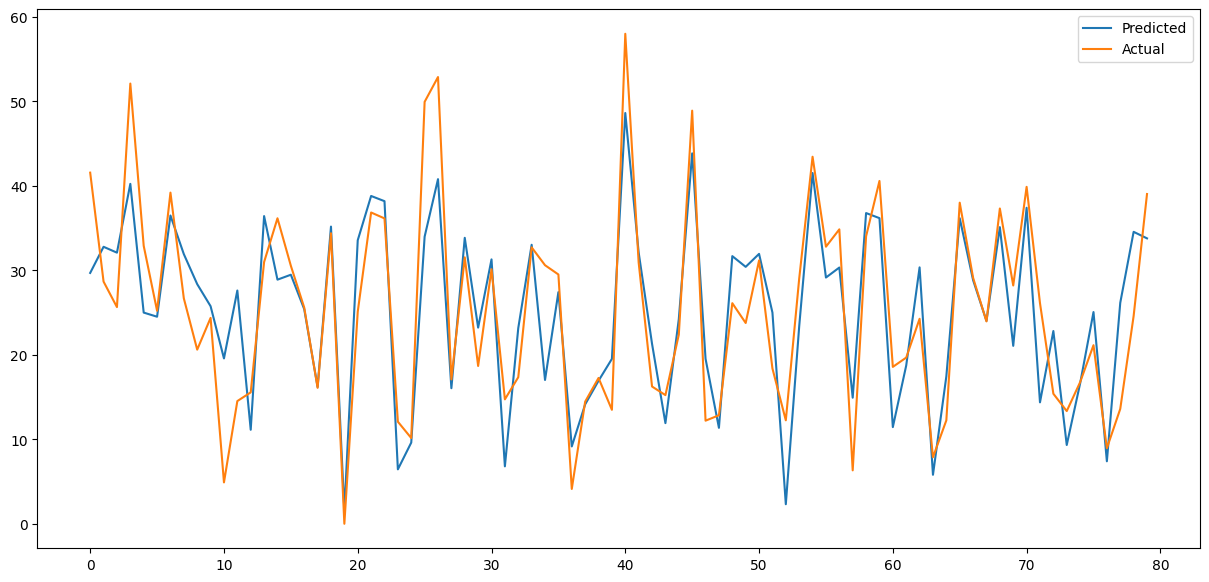

In [141]:
score_metrix(LinearRegression(),x_train2,x_test2,y_train2,y_test2)

## Lasso with Hyperparameter Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
L1 = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_cv = GridSearchCV(L1, parameters, cv = 10)

In [146]:
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]})

In [147]:
lasso_cv.best_params_

{'alpha': 1e-15}

In [148]:
lasso_cv.best_score_

0.7498867533095245

In [149]:
lasso_cv.best_estimator_

Lasso(alpha=1e-15)

Training score  = 0.7531796877853583
The best parameters found out to be :{'alpha': 1e-15} 
where model best score is:  0.7498867533095245 

MAE : 4.847051071964787
MSE : 38.11219043742058
RMSE : 6.173507142412697
R2 : 0.7481776437919625
Adjusted R2 :  0.7447966954910212 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


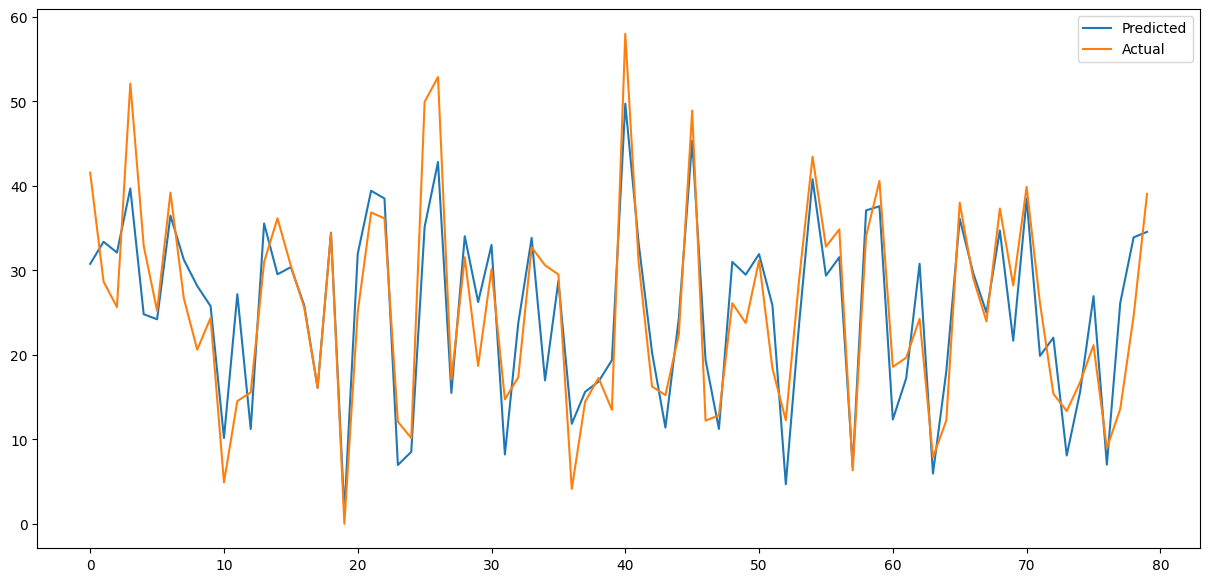

In [150]:
score_metrix(lasso_cv,x_train,x_test,y_train,y_test)

## PolynomialFeatures(2) Degree ( 1, 2, 3)

##Linear Regression

In [151]:
from sklearn.preprocessing import PolynomialFeatures

In [152]:
poly = PolynomialFeatures(2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

Training score  = 0.8637316436213711
MAE : 3.563714235164886
MSE : 23.245738190432892
RMSE : 4.821383431177496
R2 : 0.846406189313055
Adjusted R2 :  0.8049786243655901 

********************************************************************************
coefficient 
 [ 2.02986815e+03  2.00433988e+00 -2.96508684e+00  1.53661794e-01
  3.02756345e-01  1.59145773e+00  1.38184330e+00 -2.26529870e+00
 -7.56389644e+12 -3.88385426e+12  9.61401368e+11 -8.78258691e+11
  2.93369854e+12  2.14797332e+12 -6.92481849e+12 -1.04794143e+10
  3.28596797e+12  9.40137013e+12 -3.18597210e+11 -5.67337341e+12
  1.27847825e+12 -2.04564981e+13 -6.38913174e+12  6.08460352e+11
  1.54483357e+12  1.59060941e+12 -7.76805577e+11 -8.90927401e+12
 -5.36889797e+12  1.40862278e+12  1.00786367e+01  4.54583389e+00
 -1.12845189e+00 -1.10009766e+00 -2.09023438e+01 -2.09008789e+00
 -3.25341797e+00  1.08032227e+00 -6.44836426e-01 -1.83319092e+00
  6.04736328e-01  1.18814649e+11  7.91531162e+10 -3.94498498e+11
 -2.41658020e+00  9.

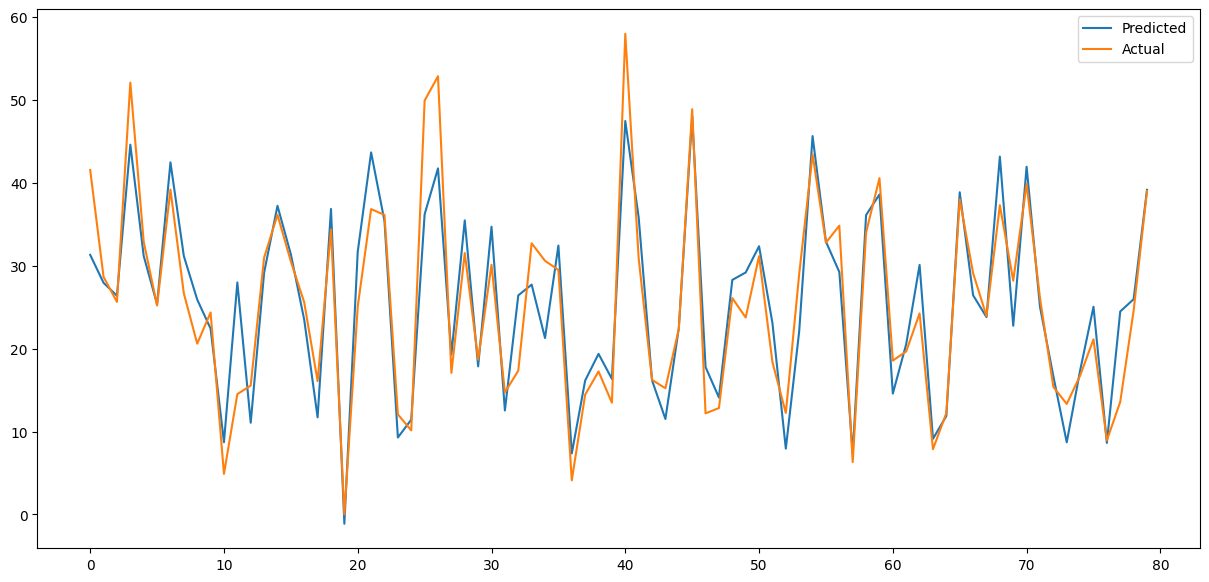

In [153]:
score_metrix(LinearRegression(),x_train_poly,x_test_poly,y_train,y_test)

## Train test split for tree base models

In [154]:
new_x = new_df.drop(columns = ['Rented Bike Count'])
new_y = new_df['Rented Bike Count']

In [155]:
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.25,random_state = 42)

In [156]:
scaler = PowerTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [157]:
# parameters for Random forest
param_grid = {"n_estimators":[50,100,150],
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

In [158]:
random_forest_model = GridSearchCV(RandomForestRegressor(),param_grid = param_grid, n_jobs = -1, verbose = 2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9515380878524158
The best parameters found out to be :{'max_depth': 20, 'max_features': 24, 'min_samples_split': 10, 'n_estimators': 150} 
where model best score is:  0.8579443679578773 

MAE : 154.89443190907087
MSE : 56925.21387522434
RMSE : 238.5900540157203
R2 : 0.8608869083575541
Adjusted R2 :  0.8590191862938361 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


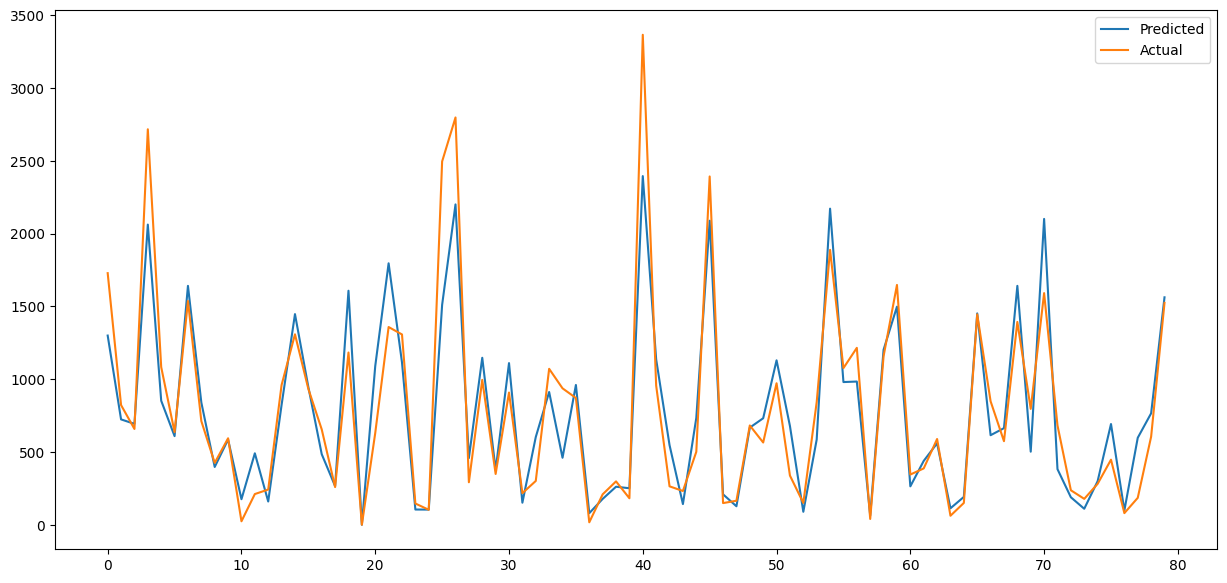

In [159]:
score_metrix(random_forest_model,x_train,x_test,y_train,y_test)

## **XgBoost** Regression **bold text**

In [161]:
params = {'learning_rate':[0.5,1,1.5,2],
          'n_estimators':[80,100,150],
          'max_depth':[15,20,30]

          }

In [162]:
xgb_grid = GridSearchCV(XGBRegressor(), param_grid = params, cv=5, verbose=2, n_jobs=-1)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training score  = 0.9999999987812235
The best parameters found out to be :{'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 80} 
where model best score is:  0.8354499440524685 

MAE : 162.67309804689395
MSE : 65744.02523064948
RMSE : 256.4059773691898
R2 : 0.8393356127409266
Adjusted R2 :  0.837178544578652 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


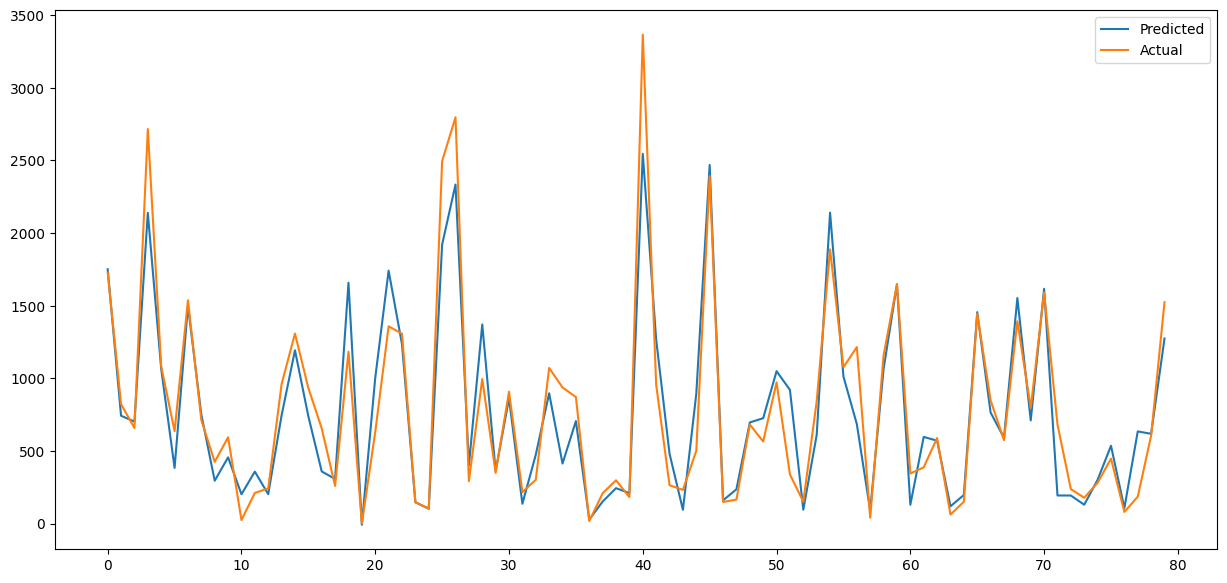

In [163]:
score_metrix(xgb_grid,x_train,x_test,y_train,y_test)

## **KNN Regressor**

Training score  = 0.8873684520023236
MAE : 182.88365296803656
MSE : 79982.99894063927
RMSE : 282.8126569668325
R2 : 0.8045385953954318
Adjusted R2 :  0.8019143450558335 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


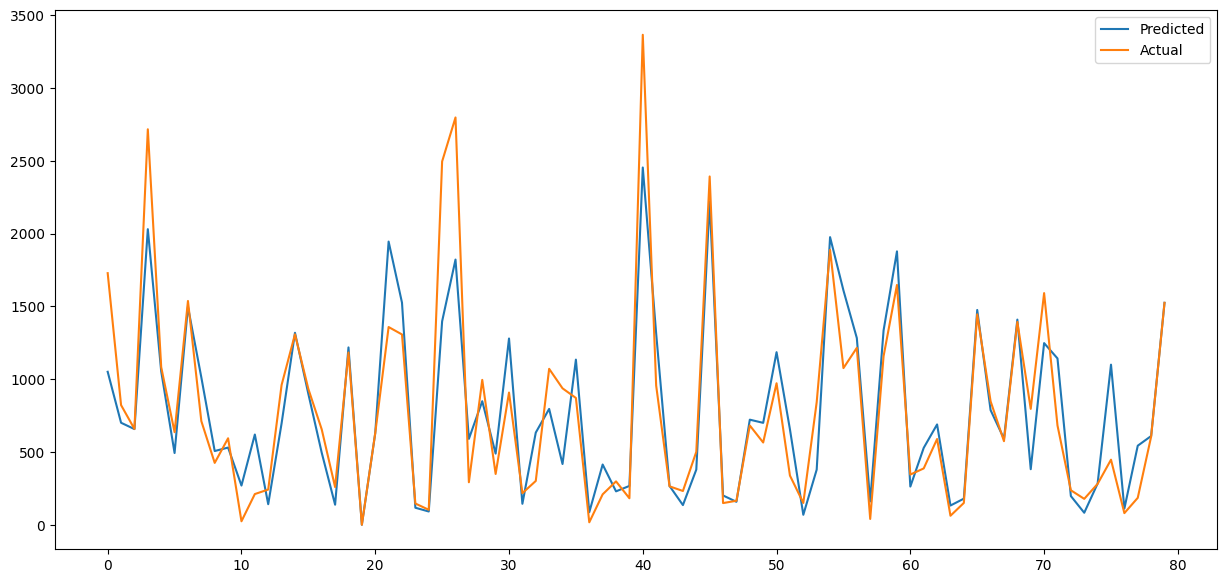

In [164]:
knn = KNeighborsRegressor()
score_metrix(knn,x_train,x_test,y_train,y_test)

## Logistics Regression

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
lg = LogisticRegression(random_state=0)

Training score  = 0.1324200913242009
MAE : 240.25525114155252
MSE : 142952.50365296804
RMSE : 378.090602439373
R2 : 0.6506545450179205
Adjusted R2 :  0.6459642588167722 

********************************************************************************
coefficient 
 [[ 0.03384459  0.07993943  0.04487934 ...  0.20988238  0.16042587
   0.03021017]
 [-0.35348543  0.66782516  0.61144628 ...  0.54532175 -0.24219055
   0.34301116]
 [ 0.01539072  0.4554913  -0.19441389 ... -0.04378232 -0.08028189
   0.52495381]
 ...
 [ 0.22218543 -0.02563681  0.60692749 ... -0.04604376 -0.05526407
  -0.29958866]
 [ 0.06707642  0.09670594  0.82645563 ... -0.06577446 -0.07487795
  -0.31782175]
 [ 0.26732532 -0.28164174  0.54499957 ... -0.05897275 -0.07420869
  -0.3408047 ]]


Intercept  =  [ 0.81460566 -2.27648137 -1.78874901 ... -0.91290773 -1.10943079
 -1.09390308]


******************** ploting the graph of Actual and predicted only with 80 observation ********************


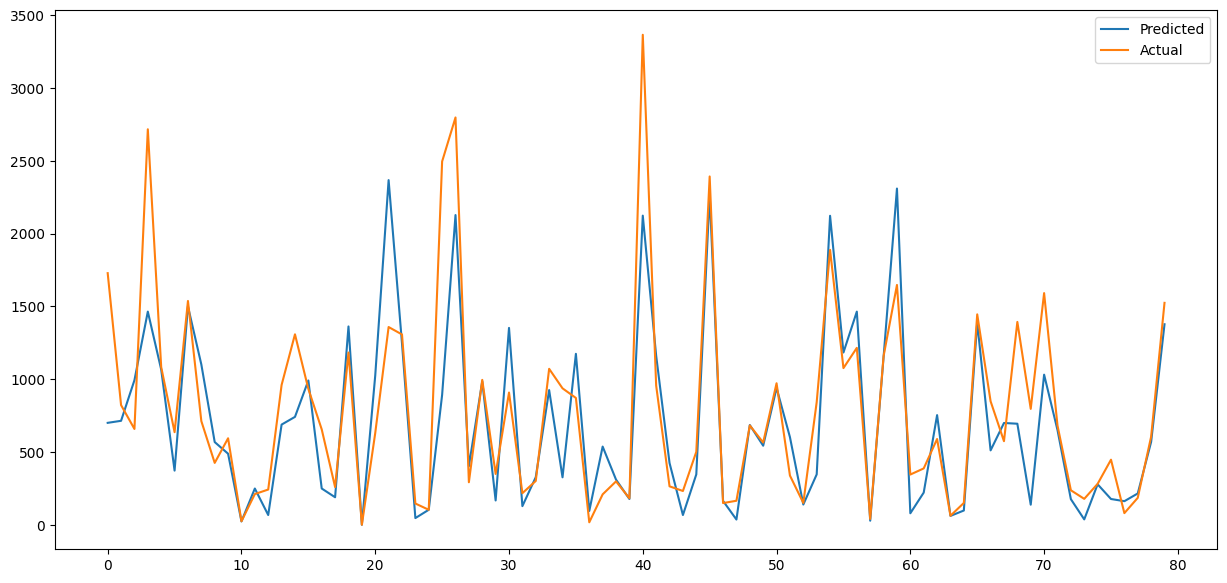

In [167]:
score_metrix(lg,x_train,x_test,y_train,y_test)